In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.offline as py 
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle
import requests
import json

In [2]:
fbc_ipos = pd.read_csv('fbc_ipos_data_2020-2023.csv')
exchange_rates = pd.read_excel('exchange_rates.xlsx')
print("The FBC dataset is {} dataset".format(fbc_ipos.shape))
print("The Exchange Rates dataset is {} dataset".format(exchange_rates.shape))

The FBC dataset is (814426, 16) dataset
The Exchange Rates dataset is (1048, 2) dataset


In [3]:
exchange_rates.head(10)

,date,exchange_rate
0,2020-06-01,20.00
1,2020-06-02,20.69
2,2020-06-03,21.38
3,2020-06-04,22.07
4,2020-06-05,22.76
5,2020-06-06,23.45
6,2020-06-07,24.14
7,2020-06-08,24.83
8,2020-06-09,25.52
9,2020-06-10,26.21


In [5]:
fbc_ipos.head(2)

,id,date,amount,billid,channel,transaction_types,type,payment_channels,currency,agent_name,agent_account,association,street,suburb,city,capture_method
0,1,2020-06-15 21:47:22,2.5,5888925011635657,FBC,SALE,CARD-SWIPE,FBC,RTGS,FBC Prod,1414384211699627,CENTRAL AFRICA BUILDING SOCIETY,23 Third Street,HARARE,HARARE,CARD_SWIPE
1,2,2020-06-15 21:56:38,2.5,5888925011635657,FBC,SALE,CARD-SWIPE,FBC,RTGS,FBC Prod,1414384211699627,CENTRAL AFRICA BUILDING SOCIETY,23 Third Street,HARARE,HARARE,CARD_SWIPE


In [6]:
fbc_ipos_copy=fbc_ipos.copy(deep=True)
exchange_rates_copy=exchange_rates.copy(deep=True)

# Adding Exchange rates to the FBC dataset

In [7]:
def mask_date(date):
    return str(date)[:10].strip()[0:].replace('-','/')
fbc_ipos['transaction_date'] = fbc_ipos['date'].apply(mask_date)

def mask_time(date):
    return str(date)[4:].strip()[7:].replace(':','')
fbc_ipos['transaction_time'] = fbc_ipos['date'].apply(mask_time)

fbc_ipos.tail(3)

,id,date,amount,billid,channel,transaction_types,type,payment_channels,currency,agent_name,agent_account,association,street,suburb,city,capture_method,transaction_date,transaction_time
814423,1118241,2023-04-12 17:40:39,825.0,4068965102169880,FBC,SALE,CARD-SWIPE,FBC,RTGS,Booties Westgate,3061045984732620,STANDARD CHARTERED BANK ZIMBABWE LIMITED,"Shop 13 Next to Stanbic, Westgate Complex, Harare","Shop 13 Next to Stanbic, Westgate Complex, Harare",Harare,ICCARD,2023/04/12,174039
814424,1118242,2023-04-12 17:43:58,9075.0,5049870402802415,FBC,SALE,CARD-SWIPE,FBC,RTGS,Booties Gweru,4715156447033257,NMB BANK LIMITED,Shop 1 34 R G Mugabe Way Gweru,Shop 1 34 R G Mugabe Way Gweru,Gweru,ICCARD,2023/04/12,174358
814425,1118243,2023-04-12 17:44:13,825.0,5557730003841275,FBC,SALE,CARD-SWIPE,FBC,RTGS,Booties Masvingo,1828109412981480,NaN,Stand No. 346 Cnr J. Tongogara and ED Mnangagw...,Stand No. 346 Cnr J. Tongogara and ED Mnangagw...,Masvingo,ICCARD,2023/04/12,174413


In [8]:
exchange_rates['date']=exchange_rates['date'].astype(str)

def change_date_format(date):
    return str(date).replace('-','/')
exchange_rates['date'] = exchange_rates['date'].apply(change_date_format)

exchange_rates.head(2)

,date,exchange_rate
0,2020/06/01,20.00
1,2020/06/02,20.69


In [9]:
print(len(exchange_rates))

1048


In [10]:
fbc_ipos.index 

RangeIndex(start=0, stop=814426, step=1)

In [11]:
fbc_ipos.columns

Index(['id', 'date', 'amount', 'billid', 'channel', 'transaction_types',
       'type', 'payment_channels', 'currency', 'agent_name', 'agent_account',
       'association', 'street', 'suburb', 'city', 'capture_method',
       'transaction_date', 'transaction_time'],
      dtype='object')

In [12]:
del fbc_ipos['id']
fbc_ipos.columns

Index(['date', 'amount', 'billid', 'channel', 'transaction_types', 'type',
       'payment_channels', 'currency', 'agent_name', 'agent_account',
       'association', 'street', 'suburb', 'city', 'capture_method',
       'transaction_date', 'transaction_time'],
      dtype='object')

In [13]:
fbc_ipos.size # This is the size of the dataframe 

13845242

In [14]:
fbc_ipos.shape # Description of the dimensionality of the dataframe rows, columns 

(814426, 17)

In [15]:
fbc_ipos.memory_usage() #The memory usage of each column in the dataframe in bytes

Index                    128
date                 6515408
amount               6515408
billid               6515408
channel              6515408
transaction_types    6515408
type                 6515408
payment_channels     6515408
currency             6515408
agent_name           6515408
agent_account        6515408
association          6515408
street               6515408
suburb               6515408
city                 6515408
capture_method       6515408
transaction_date     6515408
transaction_time     6515408
dtype: int64

In [16]:
fbc_ipos.ndim #The number of axes/ array dimensions

2

In [17]:
fbc_ipos.info() # prints a concise summary of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814426 entries, 0 to 814425
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               814426 non-null  object 
 1   amount             814426 non-null  float64
 2   billid             814426 non-null  int64  
 3   channel            814426 non-null  object 
 4   transaction_types  814426 non-null  object 
 5   type               814426 non-null  object 
 6   payment_channels   814426 non-null  object 
 7   currency           710546 non-null  object 
 8   agent_name         814426 non-null  object 
 9   agent_account      814426 non-null  int64  
 10  association        584877 non-null  object 
 11  street             814426 non-null  object 
 12  suburb             814426 non-null  object 
 13  city               814426 non-null  object 
 14  capture_method     814426 non-null  object 
 15  transaction_date   814426 non-null  object 
 16  tr

In [18]:
#identifying unique data for each feature
def unique_value(data_set, column_name):
    return data_set[column_name].nunique()

print("Number of the Unique Values:")
print(unique_value(fbc_ipos,list(fbc_ipos.columns)))

Number of the Unique Values:
date                 798277
amount               234437
billid               390035
channel                   2
transaction_types         2
type                      2
payment_channels          2
currency                  1
agent_name              169
agent_account           154
association              23
street                  152
suburb                  152
city                     36
capture_method            4
transaction_date        882
transaction_time      44689
dtype: int64


In [19]:
# Handling missing values 

def missing_value_table(credit):
    missing_value = credit.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * credit.isna().sum()//len(credit)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightblue", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(fbc_ipos)

,Missing Values,% Value
association,229549,28
currency,103880,12
date,0,0
agent_account,0,0
transaction_date,0,0
capture_method,0,0
city,0,0
suburb,0,0
street,0,0
agent_name,0,0


In [20]:
le = LabelEncoder()
fbc_ipos['transaction_types'] = le.fit_transform(fbc_ipos['transaction_types'])
fbc_ipos.describe() # compute and displays summary statistics of the dataframe 

,amount,billid,transaction_types,agent_account
count,8.144260e+05,8.144260e+05,814426.000000,8.144260e+05
mean,1.153589e+04,5.399067e+17,0.000010,5.152720e+15
std,3.798974e+04,1.690676e+18,0.003134,2.374067e+15
min,0.000000e+00,2.637710e+11,0.000000,1.112472e+15
25%,1.200000e+03,4.033650e+15,0.000000,3.061046e+15
50%,3.437600e+03,5.049870e+15,0.000000,4.792562e+15
75%,9.770560e+03,6.017049e+15,0.000000,7.519283e+15
max,3.420000e+06,6.017041e+18,1.000000,9.952960e+15


In [21]:
fbc_ipos['encripted_billid']=fbc_ipos['billid']
fbc_ipos['encripted_billid']=fbc_ipos['encripted_billid'].astype(str)
fbc_ipos['encripted_billid'].dtype
def mask_number(number):
    result = ''
    for i in range(len(number)):
        if i < 3 or i > 6:
            result += number[i]
        else:
            result += '*'
    return result

fbc_ipos['encripted_billid'] = fbc_ipos['encripted_billid'].apply(mask_number)

fbc_ipos['encripted_agent_account']=fbc_ipos['agent_account']
fbc_ipos['encripted_agent_account']=fbc_ipos['encripted_agent_account'].astype(str)
fbc_ipos['encripted_agent_account'].dtype
def mask_number(number):
    result = ''
    for i in range(len(number)):
        if i < 3 or i > 6:
            result += number[i]
        else:
            result += '*'
    return result

fbc_ipos['encripted_agent_account'] = fbc_ipos['encripted_agent_account'].apply(mask_number)

fbc_ipos.head(2)

,date,amount,billid,channel,transaction_types,type,payment_channels,currency,agent_name,agent_account,association,street,suburb,city,capture_method,transaction_date,transaction_time,encripted_billid,encripted_agent_account
0,2020-06-15 21:47:22,2.5,5888925011635657,FBC,0,CARD-SWIPE,FBC,RTGS,FBC Prod,1414384211699627,CENTRAL AFRICA BUILDING SOCIETY,23 Third Street,HARARE,HARARE,CARD_SWIPE,2020/06/15,214722,588****011635657,141****211699627
1,2020-06-15 21:56:38,2.5,5888925011635657,FBC,0,CARD-SWIPE,FBC,RTGS,FBC Prod,1414384211699627,CENTRAL AFRICA BUILDING SOCIETY,23 Third Street,HARARE,HARARE,CARD_SWIPE,2020/06/15,215638,588****011635657,141****211699627


In [22]:
del fbc_ipos['billid']
del fbc_ipos['agent_account']
del fbc_ipos['transaction_types']
fbc_ipos.columns

Index(['date', 'amount', 'channel', 'type', 'payment_channels', 'currency',
       'agent_name', 'association', 'street', 'suburb', 'city',
       'capture_method', 'transaction_date', 'transaction_time',
       'encripted_billid', 'encripted_agent_account'],
      dtype='object')

In [23]:
fbc_ipos.head(2)

,date,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,city,capture_method,transaction_date,transaction_time,encripted_billid,encripted_agent_account
0,2020-06-15 21:47:22,2.5,FBC,CARD-SWIPE,FBC,RTGS,FBC Prod,CENTRAL AFRICA BUILDING SOCIETY,23 Third Street,HARARE,HARARE,CARD_SWIPE,2020/06/15,214722,588****011635657,141****211699627
1,2020-06-15 21:56:38,2.5,FBC,CARD-SWIPE,FBC,RTGS,FBC Prod,CENTRAL AFRICA BUILDING SOCIETY,23 Third Street,HARARE,HARARE,CARD_SWIPE,2020/06/15,215638,588****011635657,141****211699627


In [24]:
#distribution of association with respect to City.
#pd.crosstab(fbc_ipos["association"],fbc_ipos["City"])
pd.crosstab(index = fbc_ipos['association'],
           columns = fbc_ipos['city'],
           dropna = True)

city,Beitbridge,Bindura,Bulawayo,Bulwayo,Chegutu,Chinhoyi,Chipinge,Chiredzi,Chitungwiza,Chivhu,...,Mutare,Mutoko,Mvurwi,Ngezi,Nyanga,Redcliff,Rusape,"Ruwa,Zimbabwe",Victoria Falls,Zvishavane
association,,,,,,,,,,,,,,,,,,,,,
AFRICAN CENTURY BANK,0,4,2,0,343,3,0,0,1,0,...,1,0,0,1,0,0,1,1,0,1
AGRICULTURAL BANK OF ZIMBWABWE LIMITED,12,312,1709,152,622,237,242,333,4,1,...,181,225,40,2,59,0,813,1,25,2037
BANCABC LIMITED,116,152,1315,90,30,54,18,259,7,0,...,260,6,1,6,1,0,161,13,185,2705
BARCLAYS BANK OF ZIMBABWE LIMITED,817,411,3769,176,108,333,18,303,52,0,...,176,34,2,16,2,1,366,30,280,3609
CBZ-SMARTCASH CARD,0,9,43,1,0,7,7,11,0,0,...,6,0,0,0,0,0,38,0,1,9
CBZ-TELECASH,5,0,8,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CENTRAL AFRICA BUILDING SOCIETY,592,865,5449,475,634,620,620,609,97,3,...,717,77,21,37,73,2,1923,76,704,8921
ECOBANK LIMITED,1,287,1104,70,26,1,5,5,4,0,...,107,1,0,1,2,1,28,10,0,32
FBC BANK LIMITED,95,91,2483,234,75,517,20,9,69,0,...,360,8,2,8,9,1,279,16,540,8982


In [25]:
fbc_ipos['association'].unique()

array(['CENTRAL AFRICA BUILDING SOCIETY', 'ZB BANK LIMITED',
       'NMB BANK LIMITED', 'STEWARD BANK LIMITED', nan,
       'FBC BANK LIMITED(MasterCard)', 'MBCA BANK',
       'STANBIC BANK ZIMBABWE LIMITED',
       'STANDARD CHARTERED BANK ZIMBABWE LIMITED',
       'FBC-OneWallet One Money', 'FBC BUILDING SOCIETY',
       'AGRICULTURAL BANK OF ZIMBWABWE LIMITED',
       "PEOPLE'S OWN SAVINGS BANK", 'BANCABC LIMITED', 'FBC BANK LIMITED',
       'BARCLAYS BANK OF ZIMBABWE LIMITED', 'POSB-MFS MYCASH CARD',
       'CBZ-SMARTCASH CARD', 'METROPOLITAN BANK LIMITED',
       'ECOBANK LIMITED', 'CBZ-TELECASH', 'AFRICAN CENTURY BANK',
       'GETBUCKS', 'STEWARD-ECOCASH CARD'], dtype=object)

In [26]:
fbc_ipos.isnull().sum()

date                            0
amount                          0
channel                         0
type                            0
payment_channels                0
currency                   103880
agent_name                      0
association                229549
street                          0
suburb                          0
city                            0
capture_method                  0
transaction_date                0
transaction_time                0
encripted_billid                0
encripted_agent_account         0
dtype: int64

In [27]:
fbc_ipos[fbc_ipos.isnull().any(axis=1)].head(2)

,date,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,city,capture_method,transaction_date,transaction_time,encripted_billid,encripted_agent_account
9,2020-06-27 15:43:27,110.0,FBC ECOCASH,MOBILE-MONEY,FBC ECOCASH,NaN,Booties Phamarcy,NaN,23 Third Street,HARARE,HARARE,KEY IN,2020/06/27,154327,263****69182,141****211699627
10,2020-06-27 15:46:12,110.0,FBC ECOCASH,MOBILE-MONEY,FBC ECOCASH,NaN,Booties Phamarcy,NaN,23 Third Street,HARARE,HARARE,KEY IN,2020/06/27,154612,263****69182,141****211699627


In [28]:
fbc_ipos.loc[fbc_ipos['channel'] == 'FBC ECOCASH', 'currency'] = 'ECOCASH'
fbc_ipos.loc[fbc_ipos['channel'] == 'FBC ECOCASH', 'association'] = 'ECOCASH'

In [29]:
fbc_ipos.isnull().sum()

date                            0
amount                          0
channel                         0
type                            0
payment_channels                0
currency                        7
agent_name                      0
association                125676
street                          0
suburb                          0
city                            0
capture_method                  0
transaction_date                0
transaction_time                0
encripted_billid                0
encripted_agent_account         0
dtype: int64

In [30]:
fbc_ipos[fbc_ipos['currency'].isnull()].head(2)

,date,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,city,capture_method,transaction_date,transaction_time,encripted_billid,encripted_agent_account
178319,2021-12-01 10:56:09,2.0,FBC,CARD-SWIPE,FBC,NaN,POSCloud Test Machine,NMB BANK LIMITED,"3RD Floor,Beverly Court Building,100 N Mandela...","3RD Floor,Beverly Court Building,100 N Mandela...",HARARE,CARD_SWIPE,2021/12/01,105609,504****000641660,394****160692928
178328,2021-12-01 10:59:16,3.0,FBC,CARD-SWIPE,FBC,NaN,POSCloud Test Machine,NMB BANK LIMITED,"3RD Floor,Beverly Court Building,100 N Mandela...","3RD Floor,Beverly Court Building,100 N Mandela...",HARARE,CARD_SWIPE,2021/12/01,105916,504****000641660,394****160692928


In [31]:
fbc_ipos.loc[fbc_ipos['currency'].isnull(), 'currency'] = 'TEST'
fbc_ipos[fbc_ipos['currency'].isnull()].head(7)

,date,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,city,capture_method,transaction_date,transaction_time,encripted_billid,encripted_agent_account


In [32]:
fbc_ipos.isnull().sum()

date                            0
amount                          0
channel                         0
type                            0
payment_channels                0
currency                        0
agent_name                      0
association                125676
street                          0
suburb                          0
city                            0
capture_method                  0
transaction_date                0
transaction_time                0
encripted_billid                0
encripted_agent_account         0
dtype: int64

In [33]:
fbc_ipos[fbc_ipos['association'].isnull()].head(2)

,date,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,city,capture_method,transaction_date,transaction_time,encripted_billid,encripted_agent_account
37,2020-11-13 16:24:29,330.0,FBC,CARD-SWIPE,FBC,RTGS,Booties Eastgate,NaN,Shop 26,"Eastgate Market,Cnr Wayne/R Mugabe,Harare",Harare,ICCARD,2020/11/13,162429,403****013077420,128****938220998
45,2020-11-16 10:12:40,1292.5,FBC,CARD-SWIPE,FBC,RTGS,Booties Eastgate,NaN,Shop 26,"Eastgate Market,Cnr Wayne/R Mugabe,Harare",Harare,ICCARD,2020/11/16,101240,403****041155941,128****938220998


In [34]:
fbc_ipos.loc[fbc_ipos['association'].isnull(), 'association'] = 'OTHER BANKS'
fbc_ipos[fbc_ipos['association'].isnull()].head()

,date,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,city,capture_method,transaction_date,transaction_time,encripted_billid,encripted_agent_account


In [35]:
fbc_ipos.isnull().sum()

date                       0
amount                     0
channel                    0
type                       0
payment_channels           0
currency                   0
agent_name                 0
association                0
street                     0
suburb                     0
city                       0
capture_method             0
transaction_date           0
transaction_time           0
encripted_billid           0
encripted_agent_account    0
dtype: int64

In [36]:
fbc_ipos.nunique()

date                       798277
amount                     234437
channel                         2
type                            2
payment_channels                2
currency                        3
agent_name                    169
association                    25
street                        152
suburb                        152
city                           36
capture_method                  4
transaction_date              882
transaction_time            44689
encripted_billid           370589
encripted_agent_account       154
dtype: int64

In [37]:
fbc_ipos.dtypes

date                        object
amount                     float64
channel                     object
type                        object
payment_channels            object
currency                    object
agent_name                  object
association                 object
street                      object
suburb                      object
city                        object
capture_method              object
transaction_date            object
transaction_time            object
encripted_billid            object
encripted_agent_account     object
dtype: object

In [38]:
fbc_ipos['date'] = pd.to_datetime(fbc_ipos['date'])
fbc_ipos.dtypes

date                       datetime64[ns]
amount                            float64
channel                            object
type                               object
payment_channels                   object
currency                           object
agent_name                         object
association                        object
street                             object
suburb                             object
city                               object
capture_method                     object
transaction_date                   object
transaction_time                   object
encripted_billid                   object
encripted_agent_account            object
dtype: object

In [39]:
fbc_ipos.columns

Index(['date', 'amount', 'channel', 'type', 'payment_channels', 'currency',
       'agent_name', 'association', 'street', 'suburb', 'city',
       'capture_method', 'transaction_date', 'transaction_time',
       'encripted_billid', 'encripted_agent_account'],
      dtype='object')

In [40]:
fbc_ipos['dayOfWeek'] = fbc_ipos['date'].dt.day_name()

In [41]:
fbc_ipos['city'].unique()

array(['HARARE', 'Harare', 'Gweru', 'Rusape', 'Mutare', 'Bulawayo',
       'Kwekwe', 'Kadoma', 'Murehwa', 'Chiredzi', 'Chinhoyi',
       'Zvishavane', 'Bulwayo', 'Bindura', 'Chipinge', 'Masvingo',
       'Chegutu', 'Chitungwiza', 'Harare, Zimbabwe', 'Ruwa,Zimbabwe',
       'Chivhu', 'Gokwe', 'Beitbridge', 'Redcliff', 'Mt Darwin', 'Mutoko',
       'Mvurwi', 'Marondera', 'Murambinda', 'Nyanga', 'Ngezi', 'Karoi',
       'Kariba', 'Murombedzi', 'Victoria Falls', 'Hwange'], dtype=object)

In [42]:
fbc_ipos.loc[fbc_ipos['city'] == 'HARARE', 'city'] = 'Harare'
fbc_ipos.loc[fbc_ipos['city'] == 'Harare, Zimbabwe', 'city'] = 'Harare'
fbc_ipos.loc[fbc_ipos['city'] == 'Bulwayo', 'city'] = 'Bulawayo'
fbc_ipos.loc[fbc_ipos['city'] == 'Ruwa,Zimbabwe', 'city'] = 'Ruwa'
fbc_ipos.loc[fbc_ipos['city'] == 'Mt Darwin', 'city'] = 'Mt-Darwin'
fbc_ipos['city'].unique()

array(['Harare', 'Gweru', 'Rusape', 'Mutare', 'Bulawayo', 'Kwekwe',
       'Kadoma', 'Murehwa', 'Chiredzi', 'Chinhoyi', 'Zvishavane',
       'Bindura', 'Chipinge', 'Masvingo', 'Chegutu', 'Chitungwiza',
       'Ruwa', 'Chivhu', 'Gokwe', 'Beitbridge', 'Redcliff', 'Mt-Darwin',
       'Mutoko', 'Mvurwi', 'Marondera', 'Murambinda', 'Nyanga', 'Ngezi',
       'Karoi', 'Kariba', 'Murombedzi', 'Victoria Falls', 'Hwange'],
      dtype=object)

In [43]:
fbc_ipos['association'].unique()

array(['CENTRAL AFRICA BUILDING SOCIETY', 'ZB BANK LIMITED',
       'NMB BANK LIMITED', 'STEWARD BANK LIMITED', 'ECOCASH',
       'FBC BANK LIMITED(MasterCard)', 'MBCA BANK',
       'STANBIC BANK ZIMBABWE LIMITED',
       'STANDARD CHARTERED BANK ZIMBABWE LIMITED', 'OTHER BANKS',
       'FBC-OneWallet One Money', 'FBC BUILDING SOCIETY',
       'AGRICULTURAL BANK OF ZIMBWABWE LIMITED',
       "PEOPLE'S OWN SAVINGS BANK", 'BANCABC LIMITED', 'FBC BANK LIMITED',
       'BARCLAYS BANK OF ZIMBABWE LIMITED', 'POSB-MFS MYCASH CARD',
       'CBZ-SMARTCASH CARD', 'METROPOLITAN BANK LIMITED',
       'ECOBANK LIMITED', 'CBZ-TELECASH', 'AFRICAN CENTURY BANK',
       'GETBUCKS', 'STEWARD-ECOCASH CARD'], dtype=object)

In [44]:
fbc_ipos.loc[fbc_ipos['association'] == 'ZB BANK LIMITED', 'association'] = 'ZB'
fbc_ipos.loc[fbc_ipos['association'] == 'NMB BANK LIMITED', 'association'] = 'NMB'
fbc_ipos.loc[fbc_ipos['association'] == 'STEWARD BANK LIMITED', 'association'] = 'STEWARD'
fbc_ipos.loc[fbc_ipos['association'] == 'STEWARD-ECOCASH CARD', 'association'] = 'STEWARD'
fbc_ipos.loc[fbc_ipos['association'] == 'CENTRAL AFRICA BUILDING SOCIETY', 'association'] = 'CABS'
fbc_ipos.loc[fbc_ipos['association'] == 'ECOCASH', 'association'] = 'ECOCASH'
fbc_ipos.loc[fbc_ipos['association'] == 'FBC BANK LIMITED(MasterCard)', 'association'] = 'FBC'
fbc_ipos.loc[fbc_ipos['association'] == 'MBCA BANK', 'association'] = 'MBCA'
fbc_ipos.loc[fbc_ipos['association'] == 'STANBIC BANK ZIMBABWE LIMITED', 'association'] = 'STANBIC'
fbc_ipos.loc[fbc_ipos['association'] == 'STANDARD CHARTERED BANK ZIMBABWE LIMITED', 'association'] = 'STANDARD'
fbc_ipos.loc[fbc_ipos['association'] == 'OTHER BANKS', 'association'] = 'OTHERS'
fbc_ipos.loc[fbc_ipos['association'] == 'FBC-OneWallet One Money', 'association'] = 'FBC'
fbc_ipos.loc[fbc_ipos['association'] == 'FBC BUILDING SOCIETY', 'association'] = 'FBC'
fbc_ipos.loc[fbc_ipos['association'] == 'AGRICULTURAL BANK OF ZIMBWABWE LIMITED', 'association'] = 'ABZ'
fbc_ipos.loc[fbc_ipos['association'] == "PEOPLE'S OWN SAVINGS BANK", 'association'] = 'POSB'
fbc_ipos.loc[fbc_ipos['association'] == 'BANCABC LIMITED', 'association'] = 'BANCABC'
fbc_ipos.loc[fbc_ipos['association'] == 'FBC BANK LIMITED', 'association'] = 'FBC'
fbc_ipos.loc[fbc_ipos['association'] == 'BARCLAYS BANK OF ZIMBABWE LIMITED', 'association'] = 'BARCLAYS'
fbc_ipos.loc[fbc_ipos['association'] == "POSB-MFS MYCASH CARD", 'association'] = 'POSB'
fbc_ipos.loc[fbc_ipos['association'] == 'CBZ-SMARTCASH CARD', 'association'] = 'CBZ'
fbc_ipos.loc[fbc_ipos['association'] == 'METROPOLITAN BANK LIMITED', 'association'] = 'METROPOLITAN'
fbc_ipos.loc[fbc_ipos['association'] == 'ECOBANK LIMITED', 'association'] = 'ECOBANK'
fbc_ipos.loc[fbc_ipos['association'] == "CBZ-TELECASH", 'association'] = 'CBZ'
fbc_ipos.loc[fbc_ipos['association'] == 'AFRICAN CENTURY BANK', 'association'] = 'ACB'
fbc_ipos.loc[fbc_ipos['association'] == "GETBUCKS", 'association'] = 'GETBUCKS'
fbc_ipos.loc[fbc_ipos['association'] == 'STEWARD-ECOCASH CARD', 'association'] = 'STEWARD'
fbc_ipos['association'].unique()

array(['CABS', 'ZB', 'NMB', 'STEWARD', 'ECOCASH', 'FBC', 'MBCA',
       'STANBIC', 'STANDARD', 'OTHERS', 'ABZ', 'POSB', 'BANCABC',
       'BARCLAYS', 'CBZ', 'METROPOLITAN', 'ECOBANK', 'ACB', 'GETBUCKS'],
      dtype=object)

In [45]:
fbc_ipos.head(2)

,date,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,city,capture_method,transaction_date,transaction_time,encripted_billid,encripted_agent_account,dayOfWeek
0,2020-06-15 21:47:22,2.5,FBC,CARD-SWIPE,FBC,RTGS,FBC Prod,CABS,23 Third Street,HARARE,Harare,CARD_SWIPE,2020/06/15,214722,588****011635657,141****211699627,Monday
1,2020-06-15 21:56:38,2.5,FBC,CARD-SWIPE,FBC,RTGS,FBC Prod,CABS,23 Third Street,HARARE,Harare,CARD_SWIPE,2020/06/15,215638,588****011635657,141****211699627,Monday


In [46]:
exchange_rates.columns = ['transaction_date','exchange_rate']
exchange_rates.head(2)

,transaction_date,exchange_rate
0,2020/06/01,20.00
1,2020/06/02,20.69


In [47]:
merged_data = pd.merge(fbc_ipos, exchange_rates, on='transaction_date')
merged_data.head()

,date,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,city,capture_method,transaction_date,transaction_time,encripted_billid,encripted_agent_account,dayOfWeek,exchange_rate
0,2020-06-15 21:47:22,2.5,FBC,CARD-SWIPE,FBC,RTGS,FBC Prod,CABS,23 Third Street,HARARE,Harare,CARD_SWIPE,2020/06/15,214722,588****011635657,141****211699627,Monday,29.66
1,2020-06-15 21:56:38,2.5,FBC,CARD-SWIPE,FBC,RTGS,FBC Prod,CABS,23 Third Street,HARARE,Harare,CARD_SWIPE,2020/06/15,215638,588****011635657,141****211699627,Monday,29.66
2,2020-06-16 13:37:09,2.5,FBC,CARD-SWIPE,FBC,RTGS,FBC Prod,CABS,23 Third Street,HARARE,Harare,CARD_SWIPE,2020/06/16,133709,588****011635657,141****211699627,Tuesday,30.34
3,2020-06-16 13:43:13,2.5,FBC,CARD-SWIPE,FBC,RTGS,FBC Prod,CABS,23 Third Street,HARARE,Harare,CARD_SWIPE,2020/06/16,134313,588****011635657,141****211699627,Tuesday,30.34
4,2020-06-17 14:22:42,2.5,FBC,CARD-SWIPE,FBC,RTGS,FBC Prod,CABS,23 Third Street,HARARE,Harare,CARD_SWIPE,2020/06/17,142242,588****011635657,141****211699627,Wednesday,31.03


In [48]:
merged_data['standardised_amount'] = merged_data['amount'] / merged_data['exchange_rate']
merged_data.tail()

,date,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,city,capture_method,transaction_date,transaction_time,encripted_billid,encripted_agent_account,dayOfWeek,exchange_rate,standardised_amount
814421,2023-04-12 17:39:49,81536.83,FBC,CARD-SWIPE,FBC,RTGS,Bhola Msasa,NMB,"7 Kingsdale Walk,Msasa,Harare","7 Kingsdale Walk,Msasa,Harare",Harare,ICCARD,2023/04/12,173949,504****200274569,751****302936088,Wednesday,997.08,81.775615
814422,2023-04-12 17:40:27,82500.00,FBC,CARD-SWIPE,FBC,RTGS,Booties Montagu,OTHERS,"Shop 7,Montagu Shopping Center,Harare","Shop 7,Montagu Shopping Center,Harare",Harare,ICCARD,2023/04/12,174027,403****014418946,366****424811484,Wednesday,997.08,82.741605
814423,2023-04-12 17:40:39,825.00,FBC,CARD-SWIPE,FBC,RTGS,Booties Westgate,STANDARD,"Shop 13 Next to Stanbic, Westgate Complex, Harare","Shop 13 Next to Stanbic, Westgate Complex, Harare",Harare,ICCARD,2023/04/12,174039,406****102169880,306****984732620,Wednesday,997.08,0.827416
814424,2023-04-12 17:43:58,9075.00,FBC,CARD-SWIPE,FBC,RTGS,Booties Gweru,NMB,Shop 1 34 R G Mugabe Way Gweru,Shop 1 34 R G Mugabe Way Gweru,Gweru,ICCARD,2023/04/12,174358,504****402802415,471****447033257,Wednesday,997.08,9.101577
814425,2023-04-12 17:44:13,825.00,FBC,CARD-SWIPE,FBC,RTGS,Booties Masvingo,OTHERS,Stand No. 346 Cnr J. Tongogara and ED Mnangagw...,Stand No. 346 Cnr J. Tongogara and ED Mnangagw...,Masvingo,ICCARD,2023/04/12,174413,555****003841275,182****412981480,Wednesday,997.08,0.827416


In [49]:
# Group the rows by card number and calculate the mean of each group
card_means = merged_data.groupby('encripted_billid')['standardised_amount'].mean()

# Map the means to a new column in the original DataFrame
merged_data['card_amount_mean'] = merged_data['encripted_billid'].map(card_means)
merged_data.tail()

,date,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,city,capture_method,transaction_date,transaction_time,encripted_billid,encripted_agent_account,dayOfWeek,exchange_rate,standardised_amount,card_amount_mean
814421,2023-04-12 17:39:49,81536.83,FBC,CARD-SWIPE,FBC,RTGS,Bhola Msasa,NMB,"7 Kingsdale Walk,Msasa,Harare","7 Kingsdale Walk,Msasa,Harare",Harare,ICCARD,2023/04/12,173949,504****200274569,751****302936088,Wednesday,997.08,81.775615,25.309673
814422,2023-04-12 17:40:27,82500.00,FBC,CARD-SWIPE,FBC,RTGS,Booties Montagu,OTHERS,"Shop 7,Montagu Shopping Center,Harare","Shop 7,Montagu Shopping Center,Harare",Harare,ICCARD,2023/04/12,174027,403****014418946,366****424811484,Wednesday,997.08,82.741605,44.442299
814423,2023-04-12 17:40:39,825.00,FBC,CARD-SWIPE,FBC,RTGS,Booties Westgate,STANDARD,"Shop 13 Next to Stanbic, Westgate Complex, Harare","Shop 13 Next to Stanbic, Westgate Complex, Harare",Harare,ICCARD,2023/04/12,174039,406****102169880,306****984732620,Wednesday,997.08,0.827416,33.720003
814424,2023-04-12 17:43:58,9075.00,FBC,CARD-SWIPE,FBC,RTGS,Booties Gweru,NMB,Shop 1 34 R G Mugabe Way Gweru,Shop 1 34 R G Mugabe Way Gweru,Gweru,ICCARD,2023/04/12,174358,504****402802415,471****447033257,Wednesday,997.08,9.101577,6.842544
814425,2023-04-12 17:44:13,825.00,FBC,CARD-SWIPE,FBC,RTGS,Booties Masvingo,OTHERS,Stand No. 346 Cnr J. Tongogara and ED Mnangagw...,Stand No. 346 Cnr J. Tongogara and ED Mnangagw...,Masvingo,ICCARD,2023/04/12,174413,555****003841275,182****412981480,Wednesday,997.08,0.827416,0.827416


In [50]:
# Calculate the number of previous transactions for each card and account
transaction_counts = merged_data.groupby(['encripted_agent_account', 'encripted_billid'])['encripted_billid'].transform('size')

# Add a new column to the transactions DataFrame with the count of previous transactions
merged_data['previous_transaction_count'] = transaction_counts
merged_data.head(2)

,date,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,...,capture_method,transaction_date,transaction_time,encripted_billid,encripted_agent_account,dayOfWeek,exchange_rate,standardised_amount,card_amount_mean,previous_transaction_count
0,2020-06-15 21:47:22,2.5,FBC,CARD-SWIPE,FBC,RTGS,FBC Prod,CABS,23 Third Street,HARARE,...,CARD_SWIPE,2020/06/15,214722,588****011635657,141****211699627,Monday,29.66,0.084289,0.082789,5
1,2020-06-15 21:56:38,2.5,FBC,CARD-SWIPE,FBC,RTGS,FBC Prod,CABS,23 Third Street,HARARE,...,CARD_SWIPE,2020/06/15,215638,588****011635657,141****211699627,Monday,29.66,0.084289,0.082789,5


In [51]:
def is_fraud(row):
    if row['previous_transaction_count'] <= 2 and row['standardised_amount'] > (row['card_amount_mean'] * (1 + 0.4)):
        return True
    else:
        return False

merged_data['is_fraud'] = merged_data.apply(is_fraud, axis=1)

merged_data.tail()

,date,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,...,transaction_date,transaction_time,encripted_billid,encripted_agent_account,dayOfWeek,exchange_rate,standardised_amount,card_amount_mean,previous_transaction_count,is_fraud
814421,2023-04-12 17:39:49,81536.83,FBC,CARD-SWIPE,FBC,RTGS,Bhola Msasa,NMB,"7 Kingsdale Walk,Msasa,Harare","7 Kingsdale Walk,Msasa,Harare",...,2023/04/12,173949,504****200274569,751****302936088,Wednesday,997.08,81.775615,25.309673,5,False
814422,2023-04-12 17:40:27,82500.00,FBC,CARD-SWIPE,FBC,RTGS,Booties Montagu,OTHERS,"Shop 7,Montagu Shopping Center,Harare","Shop 7,Montagu Shopping Center,Harare",...,2023/04/12,174027,403****014418946,366****424811484,Wednesday,997.08,82.741605,44.442299,4,False
814423,2023-04-12 17:40:39,825.00,FBC,CARD-SWIPE,FBC,RTGS,Booties Westgate,STANDARD,"Shop 13 Next to Stanbic, Westgate Complex, Harare","Shop 13 Next to Stanbic, Westgate Complex, Harare",...,2023/04/12,174039,406****102169880,306****984732620,Wednesday,997.08,0.827416,33.720003,2,False
814424,2023-04-12 17:43:58,9075.00,FBC,CARD-SWIPE,FBC,RTGS,Booties Gweru,NMB,Shop 1 34 R G Mugabe Way Gweru,Shop 1 34 R G Mugabe Way Gweru,...,2023/04/12,174358,504****402802415,471****447033257,Wednesday,997.08,9.101577,6.842544,1,False
814425,2023-04-12 17:44:13,825.00,FBC,CARD-SWIPE,FBC,RTGS,Booties Masvingo,OTHERS,Stand No. 346 Cnr J. Tongogara and ED Mnangagw...,Stand No. 346 Cnr J. Tongogara and ED Mnangagw...,...,2023/04/12,174413,555****003841275,182****412981480,Wednesday,997.08,0.827416,0.827416,1,False


# DATA VISUALISATION

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

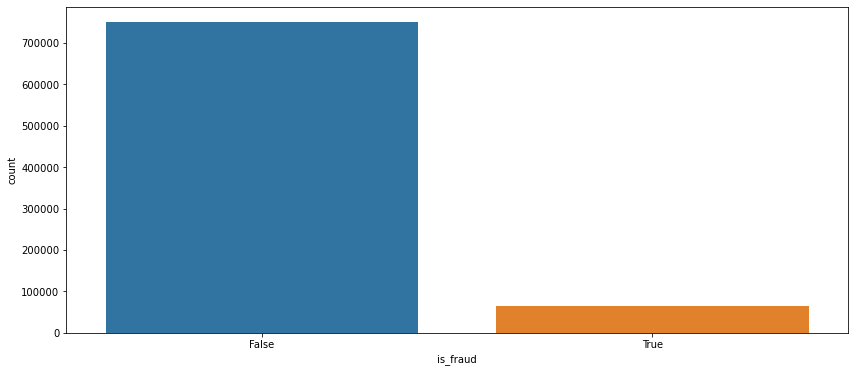

In [52]:
fig,ax=plt.subplots(figsize=(14,6))
sns.countplot(x="is_fraud", data=merged_data)

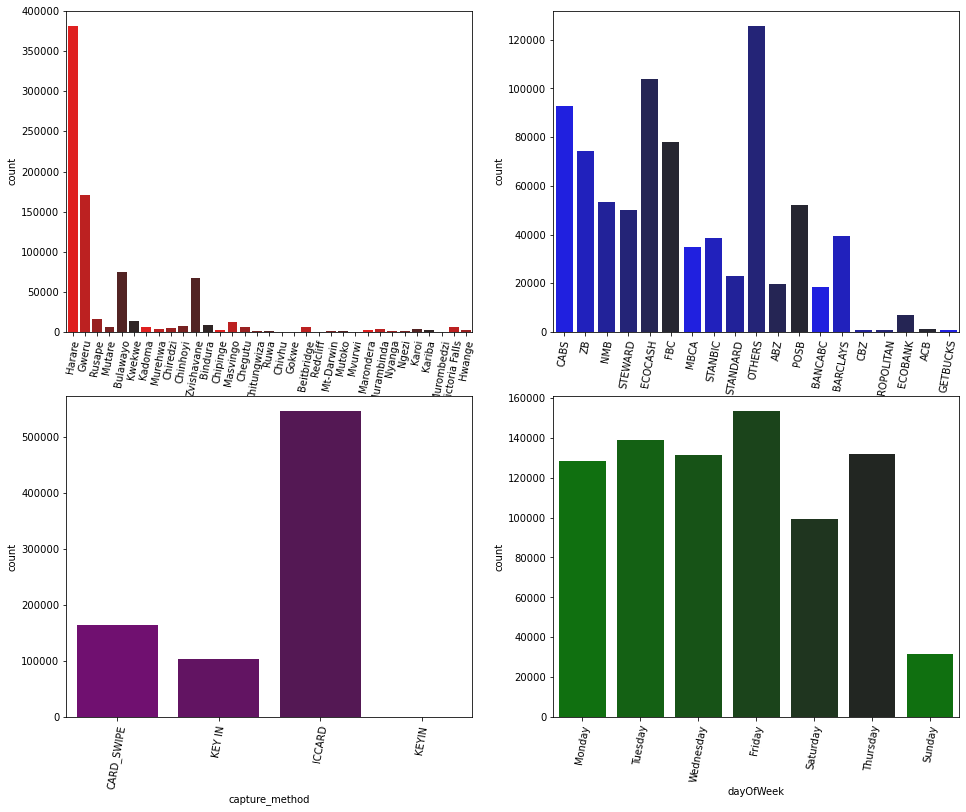

In [53]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(16,13))
cat_list=["city","association","capture_method","dayOfWeek"]
palette=["red","blue","purple","green"]
count=0
for i in range(2):
    for j in range(2):
        sns.countplot(merged_data[cat_list[count]],ax=ax[i][j],palette=sns.dark_palette(palette[count],reverse=True))
        ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(),rotation=80)
        count+=1

In [54]:
merged_data['transaction_time'] = pd.to_numeric(merged_data['transaction_time'], errors='coerce')
merged_data.dtypes

date                          datetime64[ns]
amount                               float64
channel                               object
type                                  object
payment_channels                      object
currency                              object
agent_name                            object
association                           object
street                                object
suburb                                object
city                                  object
capture_method                        object
transaction_date                      object
transaction_time                       int64
encripted_billid                      object
encripted_agent_account               object
dayOfWeek                             object
exchange_rate                        float64
standardised_amount                  float64
card_amount_mean                     float64
previous_transaction_count             int64
is_fraud                                bool
dtype: obj

In [55]:
merged_data.head(1)

,date,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,...,transaction_date,transaction_time,encripted_billid,encripted_agent_account,dayOfWeek,exchange_rate,standardised_amount,card_amount_mean,previous_transaction_count,is_fraud
0,2020-06-15 21:47:22,2.5,FBC,CARD-SWIPE,FBC,RTGS,FBC Prod,CABS,23 Third Street,HARARE,...,2020/06/15,214722,588****011635657,141****211699627,Monday,29.66,0.084289,0.082789,5,False


## Data encoding...

In [56]:
le = LabelEncoder()
data = merged_data[['date','amount','transaction_time','exchange_rate','standardised_amount','card_amount_mean','previous_transaction_count']]
data['channel'] = le.fit_transform(merged_data['channel'])
data['type'] = le.fit_transform(merged_data['type'])
data['payment_channels'] = le.fit_transform(merged_data['payment_channels'])
data['agent_name'] = le.fit_transform(merged_data['agent_name'])
data['currency'] = le.fit_transform(merged_data['currency'])
data['association'] = le.fit_transform(merged_data['association'])
data['street'] = le.fit_transform(merged_data['street'])
data['suburb'] = le.fit_transform(merged_data['suburb'])
data['city'] = le.fit_transform(merged_data['city'])
data['capture_method'] = le.fit_transform(merged_data['capture_method'])
data['encripted_billid'] = le.fit_transform(merged_data['encripted_billid'])
data['encripted_agent_account'] = le.fit_transform(merged_data['encripted_agent_account'])
data['dayOfWeek'] = le.fit_transform(merged_data['dayOfWeek'])
data['transaction_date'] = le.fit_transform(merged_data['transaction_date'])
data['is_fraud'] = le.fit_transform(merged_data['is_fraud'])
data_copy = data
data.head(2)

,date,amount,transaction_time,exchange_rate,standardised_amount,card_amount_mean,previous_transaction_count,channel,type,payment_channels,...,association,street,suburb,city,capture_method,encripted_billid,encripted_agent_account,dayOfWeek,transaction_date,is_fraud
0,2020-06-15 21:47:22,2.5,214722,29.66,0.084289,0.082789,5,0,0,0,...,4,39,99,11,0,227154,6,1,0,0
1,2020-06-15 21:56:38,2.5,215638,29.66,0.084289,0.082789,5,0,0,0,...,4,39,99,11,0,227154,6,1,0,0


<AxesSubplot:>

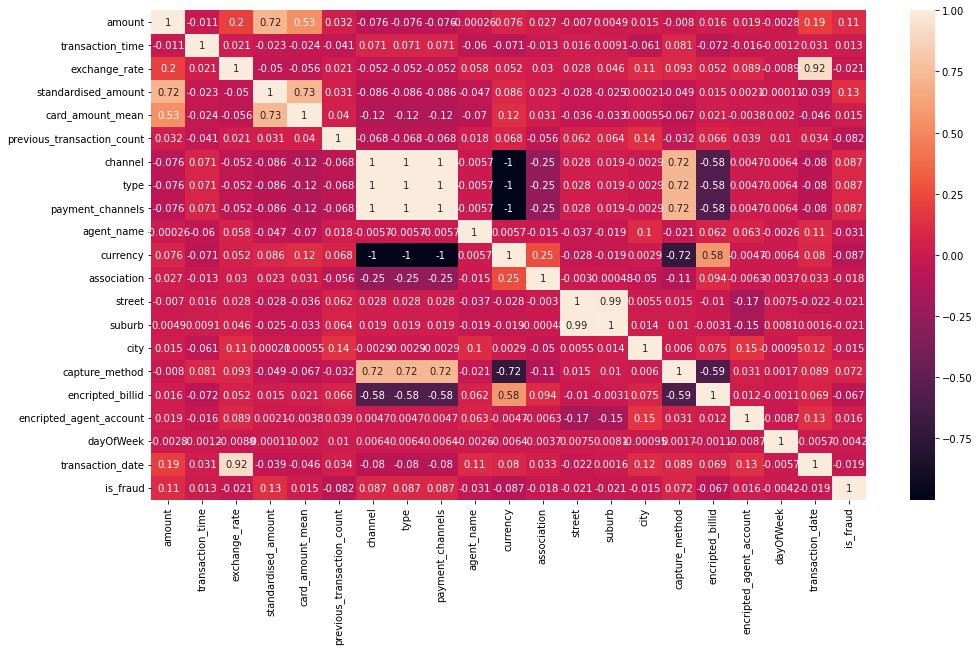

In [57]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True)

## Data Standardisation

In [58]:
from sklearn.preprocessing import StandardScaler

features = ['amount', 'channel', 'type', 'payment_channels', 'currency',
       'agent_name', 'association', 'street', 'suburb', 'city',
       'capture_method', 'transaction_date', 'transaction_time',
       'encripted_billid', 'encripted_agent_account', 'dayOfWeek',
       'exchange_rate', 'standardised_amount', 'card_amount_mean',
       'previous_transaction_count', 'is_fraud']
standardized_data  = data.loc[:, features].values

# Standardize the feature values
scaler = StandardScaler()
standardized_data  = scaler.fit_transform(standardized_data )

standardized_data1 = pd.DataFrame(data=standardized_data, columns=features)

standardized_data1

,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,city,...,transaction_date,transaction_time,encripted_billid,encripted_agent_account,dayOfWeek,exchange_rate,standardised_amount,card_amount_mean,previous_transaction_count,is_fraud
0,-0.303592,-0.382343,-0.382343,-0.382343,0.382299,0.291298,-1.250296,-1.276177,0.442218,-0.174339,...,-2.815326,3.336131,0.375727,-1.614755,-0.911845,-1.185520,-0.331850,-0.455941,-0.004023,-0.295174
1,-0.303592,-0.382343,-0.382343,-0.382343,0.382299,0.291298,-1.250296,-1.276177,0.442218,-0.174339,...,-2.815326,3.370436,0.375727,-1.614755,-0.911845,-1.185520,-0.331850,-0.455941,-0.004023,-0.295174
2,-0.303592,-0.382343,-0.382343,-0.382343,0.382299,0.291298,-1.250296,-1.276177,0.442218,-0.174339,...,-2.810234,0.302104,0.375727,-1.614755,0.925974,-1.183050,-0.331867,-0.455941,-0.004023,-0.295174
3,-0.303592,-0.382343,-0.382343,-0.382343,0.382299,0.291298,-1.250296,-1.276177,0.442218,-0.174339,...,-2.810234,0.324724,0.375727,-1.614755,0.925974,-1.183050,-0.331867,-0.455941,-0.004023,-0.295174
4,-0.303592,-0.382343,-0.382343,-0.382343,0.382299,0.291298,-1.250296,-1.276177,0.442218,-0.174339,...,-2.805143,0.621674,0.375727,-1.614755,1.385429,-1.180544,-0.331884,-0.455941,-0.004023,-0.295174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814421,1.842629,-0.382343,-0.382343,-0.382343,0.382299,-0.950039,0.326848,-0.248018,-0.317737,-0.174339,...,1.670140,1.809136,0.076868,0.957813,1.385429,2.328196,0.408550,-0.141816,-0.004023,-0.295174
814422,1.867982,-0.382343,-0.382343,-0.382343,0.382299,-0.453504,0.523991,1.294220,1.337878,-0.174339,...,1.670140,1.812058,-1.078860,-0.535195,1.385429,2.328196,0.417305,0.096424,-0.081904,-0.295174
814423,-0.281942,-0.382343,-0.382343,-0.382343,0.382299,-0.329371,1.115419,1.185993,1.256454,-0.174339,...,1.670140,1.812507,-0.828366,-0.925674,1.385429,2.328196,-0.325115,-0.037090,-0.237665,-0.295174
814424,-0.064778,-0.382343,-0.382343,-0.382343,0.382299,-0.577638,0.326848,1.023652,1.093607,-0.304093,...,1.670140,1.824454,0.282300,-0.098778,1.385429,2.328196,-0.250123,-0.371768,-0.315545,-0.295174


<AxesSubplot:>

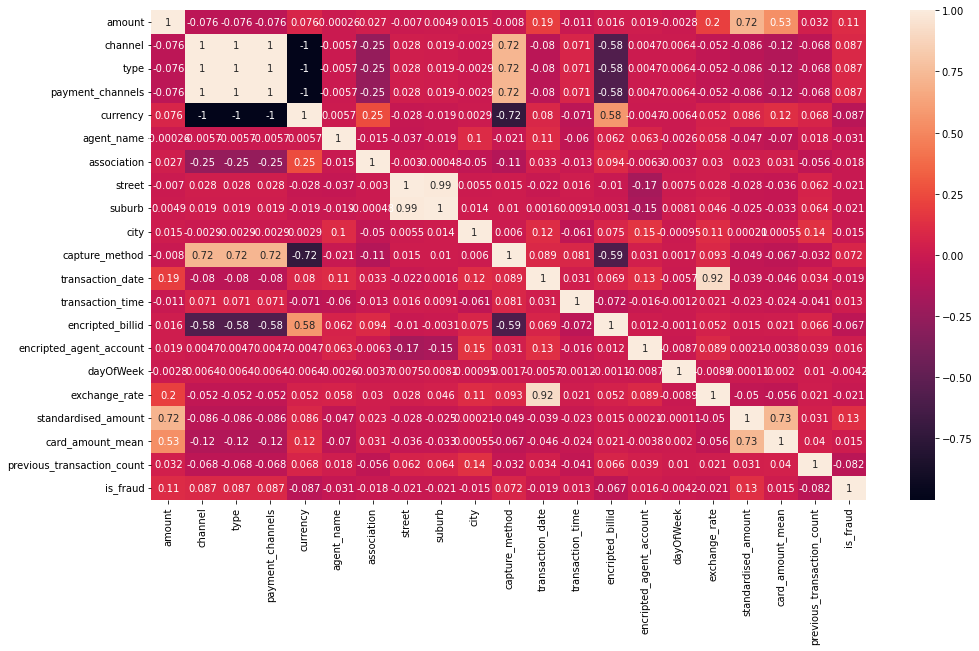

In [59]:
plt.figure(figsize=(16,9))
sns.heatmap(standardized_data1.corr(),annot=True)

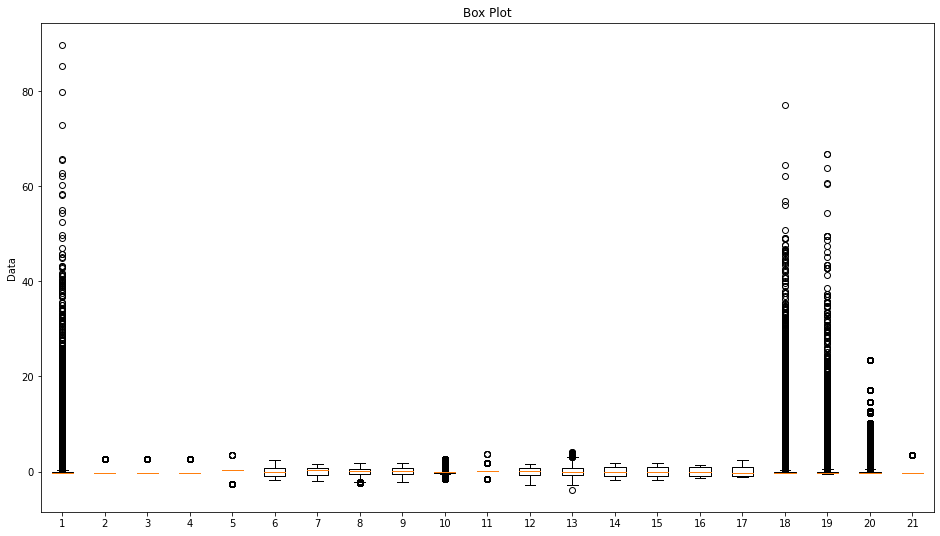

In [128]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.boxplot(standardized_data1)
ax.set_title('Box Plot') 
ax.set_ylabel('Data')

plt.show()

In [61]:
from scipy import stats

z_scores = np.abs(stats.zscore(standardized_data1["standardised_amount"]))
outliers = standardized_data1[z_scores > 3]
no_outliers = standardized_data1[z_scores <= 3]
print("Outlires: ",len(outliers)," No outliers: ",len(no_outliers))

Outlires:  10265  No outliers:  804161


<AxesSubplot:xlabel='is_fraud', ylabel='count'>

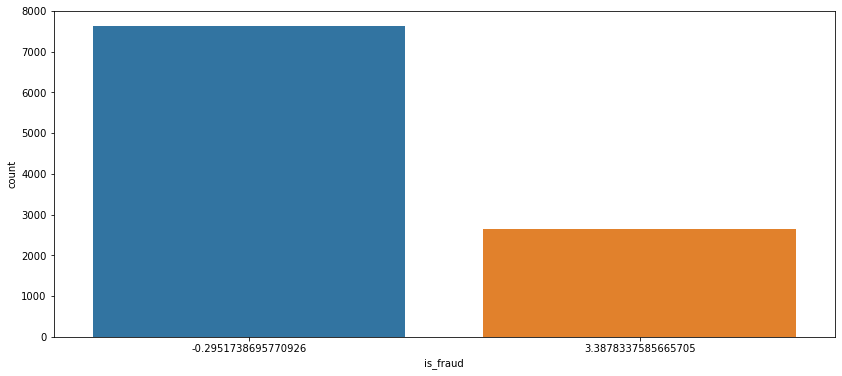

In [62]:
fig,ax=plt.subplots(figsize=(14,6))
sns.countplot(x="is_fraud", data=outliers)

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

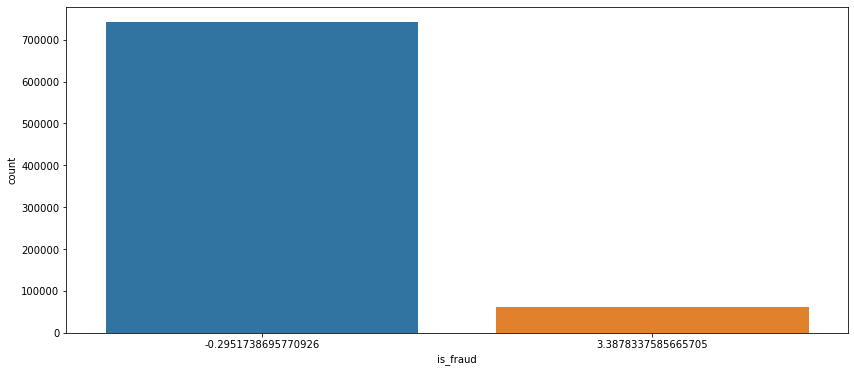

In [63]:
fig,ax=plt.subplots(figsize=(14,6))
sns.countplot(x="is_fraud", data=no_outliers)

In [64]:
outliers.head(2)

,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,city,...,transaction_date,transaction_time,encripted_billid,encripted_agent_account,dayOfWeek,exchange_rate,standardised_amount,card_amount_mean,previous_transaction_count,is_fraud
2727,0.760446,-0.382343,-0.382343,-0.382343,0.382299,-0.453504,1.312562,1.29422,1.337878,-0.174339,...,-2.632038,-0.394112,-0.215001,-0.535195,0.007065,-0.966362,3.738357,5.136052,-0.315545,-0.295174
6413,0.907196,-0.382343,-0.382343,-0.382343,0.382299,-0.453504,0.523991,1.29422,1.337878,-0.174339,...,-2.469115,-0.158170,-1.045220,-0.535195,-1.371300,-0.966362,4.299784,1.315430,-0.237665,3.387834


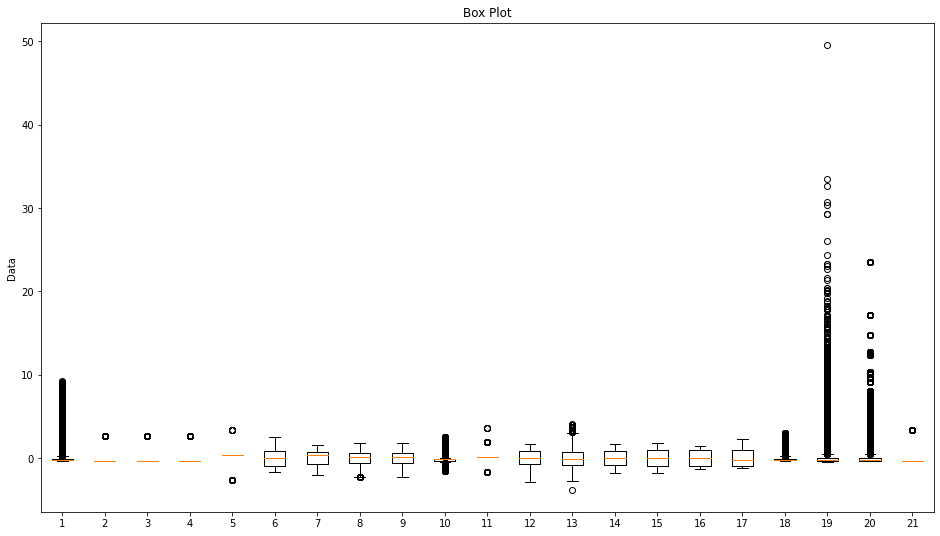

In [129]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.boxplot(no_outliers)
ax.set_title('Box Plot') 
ax.set_ylabel('Data')

plt.show()

In [66]:
data.columns

Index(['date', 'amount', 'transaction_time', 'exchange_rate',
       'standardised_amount', 'card_amount_mean', 'previous_transaction_count',
       'channel', 'type', 'payment_channels', 'agent_name', 'currency',
       'association', 'street', 'suburb', 'city', 'capture_method',
       'encripted_billid', 'encripted_agent_account', 'dayOfWeek',
       'transaction_date', 'is_fraud'],
      dtype='object')

In [67]:
legit = data[data.is_fraud==0]
fraud = data[data.is_fraud==1]
print(legit.shape)
print(fraud.shape)

(749154, 22)
(65272, 22)


  This data set is Higly unbalanced

In [68]:
legit_sample = legit.sample(n=65272)

## Under-Sampling

In [69]:
data.groupby('is_fraud').mean()

,amount,transaction_time,exchange_rate,standardised_amount,card_amount_mean,previous_transaction_count,channel,type,payment_channels,agent_name,currency,association,street,suburb,city,capture_method,encripted_billid,encripted_agent_account,dayOfWeek,transaction_date
is_fraud,,,,,,,,,,,,,,,,,,,,
0,10313.977530,125540.427967,357.771288,32.528132,36.339149,5.36079,0.119004,0.119004,0.119004,68.639371,0.881006,10.368771,86.397924,82.934350,12.376818,0.913832,188924.938621,76.088417,2.987327,554.055975
1,25560.249175,126812.553530,336.485931,84.565425,40.824799,1.50360,0.225533,0.225533,0.225533,63.990317,0.774467,10.035712,83.511061,80.095033,11.962419,1.063856,162273.272046,78.733500,2.953594,540.433953


In [70]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)
print(new_dataset.shape)
new_dataset.groupby('is_fraud').mean()

(130544, 22)


,amount,transaction_time,exchange_rate,standardised_amount,card_amount_mean,previous_transaction_count,channel,type,payment_channels,agent_name,currency,association,street,suburb,city,capture_method,encripted_billid,encripted_agent_account,dayOfWeek,transaction_date
is_fraud,,,,,,,,,,,,,,,,,,,,
0,10254.793817,125616.040216,359.682323,32.311118,36.205400,5.428331,0.117677,0.117677,0.117677,68.451373,0.882354,10.367999,86.470156,83.020438,12.375092,0.912995,189002.896633,76.384836,2.977065,555.562094
1,25560.249175,126812.553530,336.485931,84.565425,40.824799,1.503600,0.225533,0.225533,0.225533,63.990317,0.774467,10.035712,83.511061,80.095033,11.962419,1.063856,162273.272046,78.733500,2.953594,540.433953


### Uniformly distributed data

In [71]:
new_dataset.head(2)

,date,amount,transaction_time,exchange_rate,standardised_amount,card_amount_mean,previous_transaction_count,channel,type,payment_channels,...,association,street,suburb,city,capture_method,encripted_billid,encripted_agent_account,dayOfWeek,transaction_date,is_fraud
801654,2023-03-30 14:48:59,6129.00,144859,965.48,6.348138,22.308558,2,0,0,0,...,4,87,83,32,1,258587,61,4,868,0
185115,2021-12-04 14:24:50,4876.39,142450,102.77,47.449548,75.667300,4,0,0,0,...,8,11,10,11,1,298002,56,2,388,0


<AxesSubplot:xlabel='is_fraud', ylabel='count'>

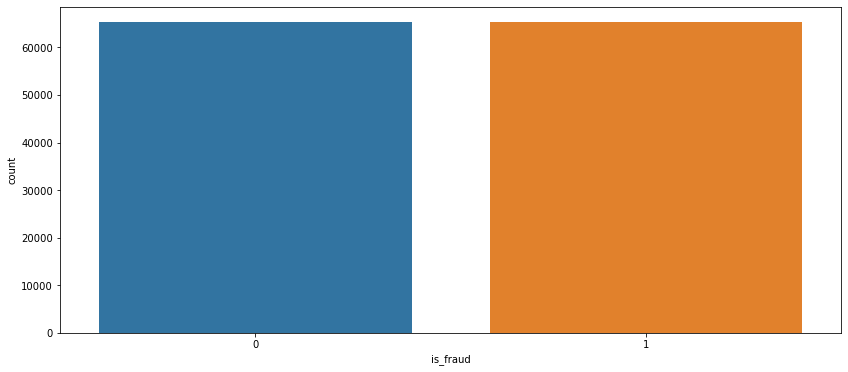

In [72]:
fig,ax=plt.subplots(figsize=(14,6))
sns.countplot(x="is_fraud", data=new_dataset)

In [73]:
new_data = new_dataset.drop("date",axis=1)
print(new_data.shape)
new_data.dtypes

(130544, 21)


amount                        float64
transaction_time                int64
exchange_rate                 float64
standardised_amount           float64
card_amount_mean              float64
previous_transaction_count      int64
channel                         int32
type                            int32
payment_channels                int32
agent_name                      int32
currency                        int32
association                     int32
street                          int32
suburb                          int32
city                            int32
capture_method                  int32
encripted_billid                int32
encripted_agent_account         int32
dayOfWeek                       int32
transaction_date                int32
is_fraud                        int64
dtype: object

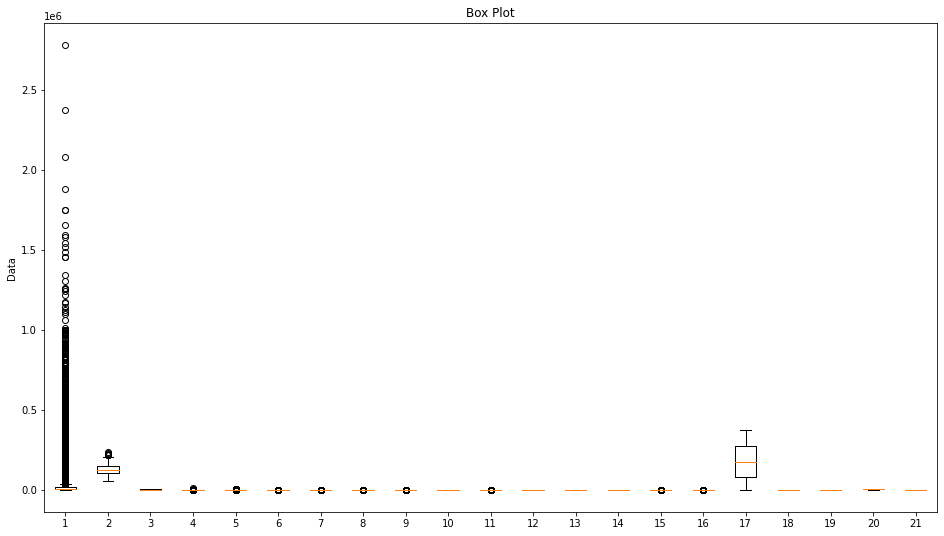

In [130]:
fig, ax = plt.subplots(figsize=(16,9))
ax.boxplot(new_data)
ax.set_title('Box Plot') 
ax.set_ylabel('Data')

plt.show()

In [75]:
new_data = new_data.astype(float)
new_data.head()

,amount,transaction_time,exchange_rate,standardised_amount,card_amount_mean,previous_transaction_count,channel,type,payment_channels,agent_name,...,association,street,suburb,city,capture_method,encripted_billid,encripted_agent_account,dayOfWeek,transaction_date,is_fraud
801654,6129.00,144859.0,965.48,6.348138,22.308558,2.0,0.0,0.0,0.0,75.0,...,4.0,87.0,83.0,32.0,1.0,258587.0,61.0,4.0,868.0,0.0
185115,4876.39,142450.0,102.77,47.449548,75.667300,4.0,0.0,0.0,0.0,35.0,...,8.0,11.0,10.0,11.0,1.0,298002.0,56.0,2.0,388.0,0.0
268429,2000.00,132849.0,119.68,16.711230,76.134480,64.0,0.0,0.0,0.0,76.0,...,4.0,93.0,89.0,32.0,1.0,247882.0,134.0,1.0,446.0,0.0
200943,2520.00,111414.0,105.61,23.861377,10.956719,3.0,1.0,1.0,1.0,55.0,...,7.0,130.0,129.0,11.0,2.0,11431.0,36.0,6.0,399.0,0.0
162369,2551.05,130632.0,101.00,25.257921,51.005123,2.0,0.0,0.0,0.0,30.0,...,2.0,77.0,71.0,11.0,0.0,176090.0,118.0,0.0,373.0,0.0


In [76]:
new_data.describe()

,amount,transaction_time,exchange_rate,standardised_amount,card_amount_mean,previous_transaction_count,channel,type,payment_channels,agent_name,...,association,street,suburb,city,capture_method,encripted_billid,encripted_agent_account,dayOfWeek,transaction_date,is_fraud
count,1.305440e+05,130544.000000,130544.000000,130544.000000,130544.000000,130544.000000,130544.000000,130544.000000,130544.000000,130544.000000,...,130544.000000,130544.000000,130544.000000,130544.000000,130544.000000,130544.000000,130544.000000,130544.000000,130544.000000,130544.000000
mean,1.790752e+04,126214.296873,348.084127,58.438272,38.515099,3.465965,0.171605,0.171605,0.171605,66.220845,...,10.201855,84.990609,81.557735,12.168755,0.988425,175638.084339,77.559168,2.965330,547.998024,0.500000
std,5.197508e+04,26566.628833,274.745154,156.321422,80.494676,9.772143,0.377038,0.377038,0.377038,42.078842,...,4.980302,37.579389,37.443726,7.266772,0.595528,109720.418630,43.572501,2.160691,196.422720,0.500002
min,1.000000e-02,54620.000000,29.660000,0.000015,0.001564,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.800000e+03,104106.000000,104.580000,8.352917,8.225059,1.000000,0.000000,0.000000,0.000000,30.000000,...,7.000000,64.000000,60.000000,10.000000,1.000000,76946.500000,37.000000,1.000000,395.000000,0.000000
50%,5.000000e+03,124024.000000,214.190000,20.411614,17.644436,2.000000,0.000000,0.000000,0.000000,65.000000,...,10.000000,85.000000,83.000000,11.000000,1.000000,171052.500000,76.000000,3.000000,548.000000,0.500000
75%,1.482842e+04,144753.000000,609.030000,49.145823,36.888297,2.000000,0.000000,0.000000,0.000000,94.000000,...,14.000000,109.000000,107.000000,11.000000,1.000000,272864.000000,118.000000,5.000000,716.000000,1.000000
max,2.780899e+06,234825.000000,997.080000,7140.747426,3038.479739,307.000000,1.000000,1.000000,1.000000,167.000000,...,18.000000,151.000000,151.000000,32.000000,2.000000,370582.000000,152.000000,6.000000,881.000000,1.000000


In [77]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('amount + transaction_time + exchange_rate + standardised_amount + card_amount_mean + \
                          previous_transaction_count + channel + type + payment_channels + agent_name + currency + association + \
                          street + suburb + city + capture_method + encripted_billid + encripted_agent_account + dayOfWeek + \
                          transaction_date ~ is_fraud',data=new_data)
print(fit.mv_test())

                        Multivariate linear model
                                                                          
--------------------------------------------------------------------------
         Intercept          Value     Num DF    Den DF    F Value   Pr > F
--------------------------------------------------------------------------
            Wilks' lambda -4051.1928 18.0000 130525.0000 -7253.1788 1.0000
           Pillai's trace  4058.9544 18.0000 130525.0000 -7253.1758 1.0000
   Hotelling-Lawley trace    -0.9986 18.0000 130525.0000 -7241.0861 1.0000
      Roy's greatest root     0.0006 18.0000 130525.0000     4.4576 0.0000
--------------------------------------------------------------------------
                                                                          
--------------------------------------------------------------------------
        is_fraud           Value      Num DF    Den DF    F Value   Pr > F
--------------------------------------------------

# DEEP DATA ANALYSIS

# Multicollinearity
Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. This can cause problems when fitting the model, as it can make it difficult to determine the individual effect of each independent variable on the dependent variable.

Computing the variance inflation factor (VIF) for each independent variable. The VIF measures how much the variance of the estimated regression coefficients is inflated due to multicollinearity. A VIF value greater than 5 or 10 is usually considered to indicate high multicollinearity.

In [78]:
new_data_copy = new_data.copy(deep=True)
new_data.head()

,amount,transaction_time,exchange_rate,standardised_amount,card_amount_mean,previous_transaction_count,channel,type,payment_channels,agent_name,...,association,street,suburb,city,capture_method,encripted_billid,encripted_agent_account,dayOfWeek,transaction_date,is_fraud
801654,6129.00,144859.0,965.48,6.348138,22.308558,2.0,0.0,0.0,0.0,75.0,...,4.0,87.0,83.0,32.0,1.0,258587.0,61.0,4.0,868.0,0.0
185115,4876.39,142450.0,102.77,47.449548,75.667300,4.0,0.0,0.0,0.0,35.0,...,8.0,11.0,10.0,11.0,1.0,298002.0,56.0,2.0,388.0,0.0
268429,2000.00,132849.0,119.68,16.711230,76.134480,64.0,0.0,0.0,0.0,76.0,...,4.0,93.0,89.0,32.0,1.0,247882.0,134.0,1.0,446.0,0.0
200943,2520.00,111414.0,105.61,23.861377,10.956719,3.0,1.0,1.0,1.0,55.0,...,7.0,130.0,129.0,11.0,2.0,11431.0,36.0,6.0,399.0,0.0
162369,2551.05,130632.0,101.00,25.257921,51.005123,2.0,0.0,0.0,0.0,30.0,...,2.0,77.0,71.0,11.0,0.0,176090.0,118.0,0.0,373.0,0.0


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

independent_variables = new_data_copy.drop('is_fraud', axis=1)

# compute the VIF for each independent variable
vif = pd.DataFrame()
vif['variable'] = independent_variables.columns
vif['VIF'] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

# display the VIF values
print(vif)

                      variable         VIF
0                       amount    2.620211
1             transaction_time   24.034300
2                exchange_rate   18.169662
3          standardised_amount    4.874732
4             card_amount_mean    3.946724
5   previous_transaction_count    1.160809
6                      channel         inf
7                         type         inf
8             payment_channels         inf
9                   agent_name    3.659335
10                    currency   61.099256
11                 association    5.780524
12                      street  227.033678
13                      suburb  212.240119
14                        city    4.013843
15              capture_method   10.917950
16            encripted_billid    6.587185
17     encripted_agent_account    4.465704
18                   dayOfWeek    2.884910
19            transaction_date   61.289448


The inf in the VIF values after running the code to compute the variance inflation factor (VIF) for each independent variable in your dataset, it means that one or more of your independent variables can be perfectly predicted from the other independent variables. In other words, there is perfect multicollinearity in your dataset.

In [80]:
del new_data_copy['channel']
del new_data_copy['type']
new_data_copy.columns

Index(['amount', 'transaction_time', 'exchange_rate', 'standardised_amount',
       'card_amount_mean', 'previous_transaction_count', 'payment_channels',
       'agent_name', 'currency', 'association', 'street', 'suburb', 'city',
       'capture_method', 'encripted_billid', 'encripted_agent_account',
       'dayOfWeek', 'transaction_date', 'is_fraud'],
      dtype='object')

In [81]:
independent_variables = new_data_copy.drop('is_fraud', axis=1)

# compute the VIF for each independent variable
vif = pd.DataFrame()
vif['variable'] = independent_variables.columns
vif['VIF'] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

# display the VIF values
print(vif)

                      variable         VIF
0                       amount    2.620211
1             transaction_time   24.034300
2                exchange_rate   18.169662
3          standardised_amount    4.874732
4             card_amount_mean    3.946724
5   previous_transaction_count    1.160809
6             payment_channels   15.309970
7                   agent_name    3.659335
8                     currency   61.099256
9                  association    5.780524
10                      street  227.033678
11                      suburb  212.240119
12                        city    4.013843
13              capture_method   10.917950
14            encripted_billid    6.587185
15     encripted_agent_account    4.465704
16                   dayOfWeek    2.884910
17            transaction_date   61.289448


In [82]:
del new_data_copy['suburb']
del new_data_copy['currency']
new_data_copy.columns

Index(['amount', 'transaction_time', 'exchange_rate', 'standardised_amount',
       'card_amount_mean', 'previous_transaction_count', 'payment_channels',
       'agent_name', 'association', 'street', 'city', 'capture_method',
       'encripted_billid', 'encripted_agent_account', 'dayOfWeek',
       'transaction_date', 'is_fraud'],
      dtype='object')

In [83]:
independent_variables = new_data_copy.drop('is_fraud', axis=1)

# compute the VIF for each independent variable
vif = pd.DataFrame()
vif['variable'] = independent_variables.columns
vif['VIF'] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

# display the VIF values
print(vif)

                      variable        VIF
0                       amount   2.598531
1             transaction_time  16.674370
2                exchange_rate  15.710809
3          standardised_amount   4.865174
4             card_amount_mean   3.926983
5   previous_transaction_count   1.160770
6             payment_channels   3.672294
7                   agent_name   3.557121
8                  association   5.320260
9                       street   5.816292
10                        city   3.913638
11              capture_method  10.313198
12            encripted_billid   5.770437
13     encripted_agent_account   4.279492
14                   dayOfWeek   2.814505
15            transaction_date  50.298770


In [84]:
del new_data_copy['transaction_date']
del new_data_copy['exchange_rate']
del new_data_copy['amount']
new_data_copy.columns

Index(['transaction_time', 'standardised_amount', 'card_amount_mean',
       'previous_transaction_count', 'payment_channels', 'agent_name',
       'association', 'street', 'city', 'capture_method', 'encripted_billid',
       'encripted_agent_account', 'dayOfWeek', 'is_fraud'],
      dtype='object')

In [85]:
independent_variables = new_data_copy.drop('is_fraud', axis=1)

# compute the VIF for each independent variable
vif = pd.DataFrame()
vif['variable'] = independent_variables.columns
vif['VIF'] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

# display the VIF values
print(vif)

                      variable        VIF
0             transaction_time  14.297408
1          standardised_amount   3.613897
2             card_amount_mean   3.917424
3   previous_transaction_count   1.159683
4             payment_channels   3.561297
5                   agent_name   3.379684
6                  association   5.236246
7                       street   5.775732
8                         city   3.856779
9               capture_method   9.290698
10            encripted_billid   5.444859
11     encripted_agent_account   4.102561
12                   dayOfWeek   2.793346


In [86]:
del new_data_copy['capture_method']
del new_data_copy['street']
new_data_copy.columns

Index(['transaction_time', 'standardised_amount', 'card_amount_mean',
       'previous_transaction_count', 'payment_channels', 'agent_name',
       'association', 'city', 'encripted_billid', 'encripted_agent_account',
       'dayOfWeek', 'is_fraud'],
      dtype='object')

In [87]:
independent_variables = new_data_copy.drop('is_fraud', axis=1)

# compute the VIF for each independent variable
vif = pd.DataFrame()
vif['variable'] = independent_variables.columns
vif['VIF'] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

# display the VIF values
print(vif)

                      variable        VIF
0             transaction_time  11.176353
1          standardised_amount   3.612614
2             card_amount_mean   3.915085
3   previous_transaction_count   1.153174
4             payment_channels   1.964121
5                   agent_name   3.335068
6                  association   4.943633
7                         city   3.785845
8             encripted_billid   5.154255
9      encripted_agent_account   4.000727
10                   dayOfWeek   2.771355


<AxesSubplot:>

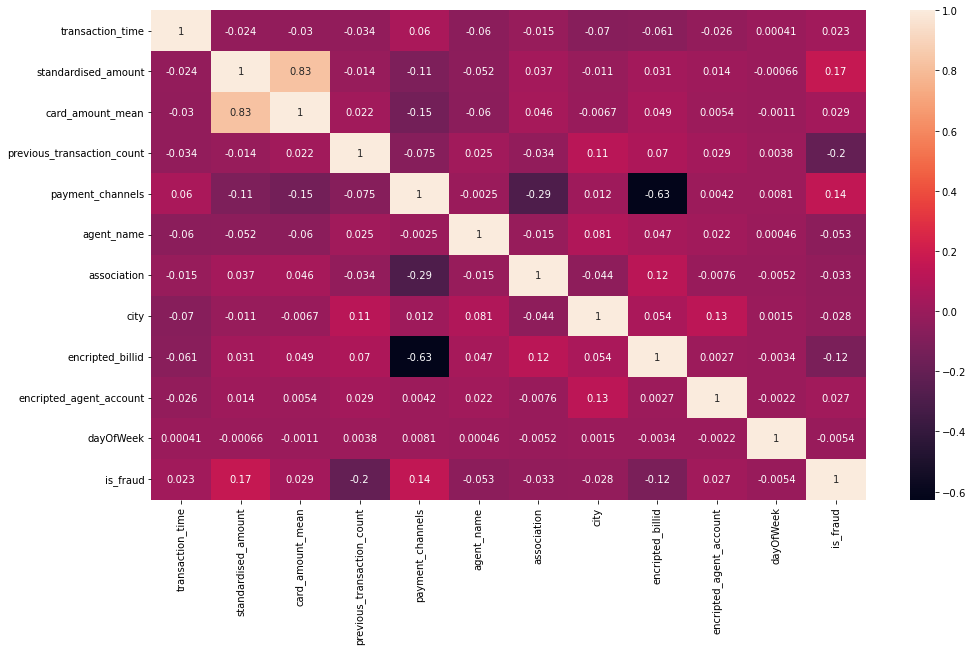

In [88]:
plt.figure(figsize=(16,9))
sns.heatmap(new_data_copy.corr(),annot=True)

In [89]:
data = standardized_data1
new_data_copy1 = new_data_copy.copy(deep=True)

original = new_data_copy.copy(deep=True)
traindf = new_data_copy.copy(deep=True)

In [90]:
merged_data.head(1)

,date,amount,channel,type,payment_channels,currency,agent_name,association,street,suburb,...,transaction_date,transaction_time,encripted_billid,encripted_agent_account,dayOfWeek,exchange_rate,standardised_amount,card_amount_mean,previous_transaction_count,is_fraud
0,2020-06-15 21:47:22,2.5,FBC,CARD-SWIPE,FBC,RTGS,FBC Prod,CABS,23 Third Street,HARARE,...,2020/06/15,214722,588****011635657,141****211699627,Monday,29.66,0.084289,0.082789,5,False


In [91]:
new_data_copy.shape

(130544, 12)

# Principal Component Analysis (PCA)

In [92]:
from sklearn.decomposition import PCA

In [93]:
new_data_copy.head(1)

,transaction_time,standardised_amount,card_amount_mean,previous_transaction_count,payment_channels,agent_name,association,city,encripted_billid,encripted_agent_account,dayOfWeek,is_fraud
801654,144859.0,6.348138,22.308558,2.0,0.0,75.0,4.0,32.0,258587.0,61.0,4.0,0.0


In [94]:
# Create a PCA instance and fit it to the data
pca = PCA(n_components=8)
principal_components = pca.fit_transform(new_data_copy)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['v1','v2','v3','v4','v5','v6','v7','v8'])

print(principal_df.shape)
principal_df.head()

(130544, 8)


,v1,v2,v3,v4,v5,v6,v7,v8
0,82646.042851,19944.398145,-55.832562,12.982106,-8.465159,10.076490,1.694713,-20.426199
1,122094.002264,18154.356008,1.904007,35.387518,37.293411,13.112577,-0.231184,0.256517
2,72130.876038,7767.840217,-25.101547,-47.735272,39.530207,47.127248,61.358655,-8.679143
3,-163954.549059,-17375.894603,-36.497626,40.966980,-10.681528,-12.421732,0.901748,-0.097365
4,382.517099,4424.257105,-23.653542,-23.458945,55.222078,0.002172,-1.839678,0.764572


In [95]:
new_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130544 entries, 801654 to 814410
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   transaction_time            130544 non-null  float64
 1   standardised_amount         130544 non-null  float64
 2   card_amount_mean            130544 non-null  float64
 3   previous_transaction_count  130544 non-null  float64
 4   payment_channels            130544 non-null  float64
 5   agent_name                  130544 non-null  float64
 6   association                 130544 non-null  float64
 7   city                        130544 non-null  float64
 8   encripted_billid            130544 non-null  float64
 9   encripted_agent_account     130544 non-null  float64
 10  dayOfWeek                   130544 non-null  float64
 11  is_fraud                    130544 non-null  float64
dtypes: float64(12)
memory usage: 12.9 MB


In [96]:
y = new_data_copy['is_fraud']
X = new_data_copy.copy()
del X['is_fraud']

In [97]:
X.head()

,transaction_time,standardised_amount,card_amount_mean,previous_transaction_count,payment_channels,agent_name,association,city,encripted_billid,encripted_agent_account,dayOfWeek
801654,144859.0,6.348138,22.308558,2.0,0.0,75.0,4.0,32.0,258587.0,61.0,4.0
185115,142450.0,47.449548,75.667300,4.0,0.0,35.0,8.0,11.0,298002.0,56.0,2.0
268429,132849.0,16.711230,76.134480,64.0,0.0,76.0,4.0,32.0,247882.0,134.0,1.0
200943,111414.0,23.861377,10.956719,3.0,1.0,55.0,7.0,11.0,11431.0,36.0,6.0
162369,130632.0,25.257921,51.005123,2.0,0.0,30.0,2.0,11.0,176090.0,118.0,0.0


In [98]:
X.columns

Index(['transaction_time', 'standardised_amount', 'card_amount_mean',
       'previous_transaction_count', 'payment_channels', 'agent_name',
       'association', 'city', 'encripted_billid', 'encripted_agent_account',
       'dayOfWeek'],
      dtype='object')

In [99]:
feature_name = list(X.columns)
# no of maximum features we need to select
num_feats= 8

# Feature Selection

## 1. Pearson correlation

This is a filter-based method.  We check the absolute value of the Pearson's correlation between the target and numerical features in our dataset. We keep the top n features based on this criterion.

In [100]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')
cor_feature

8 selected features


['city',
 'card_amount_mean',
 'association',
 'agent_name',
 'encripted_billid',
 'payment_channels',
 'standardised_amount',
 'previous_transaction_count']

## 2. Chi-Square Features

This is a filter-based method.  In this method, we calculate the chi-square metric between the target and the numerical variable and only select the variable with the maximum chi-squared values.

In [101]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
chi_feature

8 selected features


['standardised_amount',
 'previous_transaction_count',
 'payment_channels',
 'agent_name',
 'association',
 'city',
 'encripted_billid',
 'encripted_agent_account']

## 3. Recursive Feature Elimination
This is a wrapper based method.The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a featureimportances attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.


In [102]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 11 features.


RFE(estimator=LogisticRegression(), n_features_to_select=8, step=10, verbose=5)

In [103]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature

8 selected features


['standardised_amount',
 'card_amount_mean',
 'previous_transaction_count',
 'payment_channels',
 'agent_name',
 'association',
 'encripted_billid',
 'encripted_agent_account']

Based on the three feature-sets produced in above, We are going to apply MANOVA tests to determine the best feature selection and then use those features for ML and AL

In [104]:
new_data_copy.head(1)

,transaction_time,standardised_amount,card_amount_mean,previous_transaction_count,payment_channels,agent_name,association,city,encripted_billid,encripted_agent_account,dayOfWeek,is_fraud
801654,144859.0,6.348138,22.308558,2.0,0.0,75.0,4.0,32.0,258587.0,61.0,4.0,0.0


In [105]:
data_f1 = new_data_copy[cor_feature]
data_f1['is_fraud'] = y
data_f2 = new_data_copy[chi_feature]
data_f2['is_fraud'] = y
data_f3 = new_data_copy[rfe_feature]
data_f3['is_fraud'] = y
data_f1.head()

,city,card_amount_mean,association,agent_name,encripted_billid,payment_channels,standardised_amount,previous_transaction_count,is_fraud
801654,32.0,22.308558,4.0,75.0,258587.0,0.0,6.348138,2.0,0.0
185115,11.0,75.667300,8.0,35.0,298002.0,0.0,47.449548,4.0,0.0
268429,32.0,76.134480,4.0,76.0,247882.0,0.0,16.711230,64.0,0.0
200943,11.0,10.956719,7.0,55.0,11431.0,1.0,23.861377,3.0,0.0
162369,11.0,51.005123,2.0,30.0,176090.0,0.0,25.257921,2.0,0.0


<AxesSubplot:>

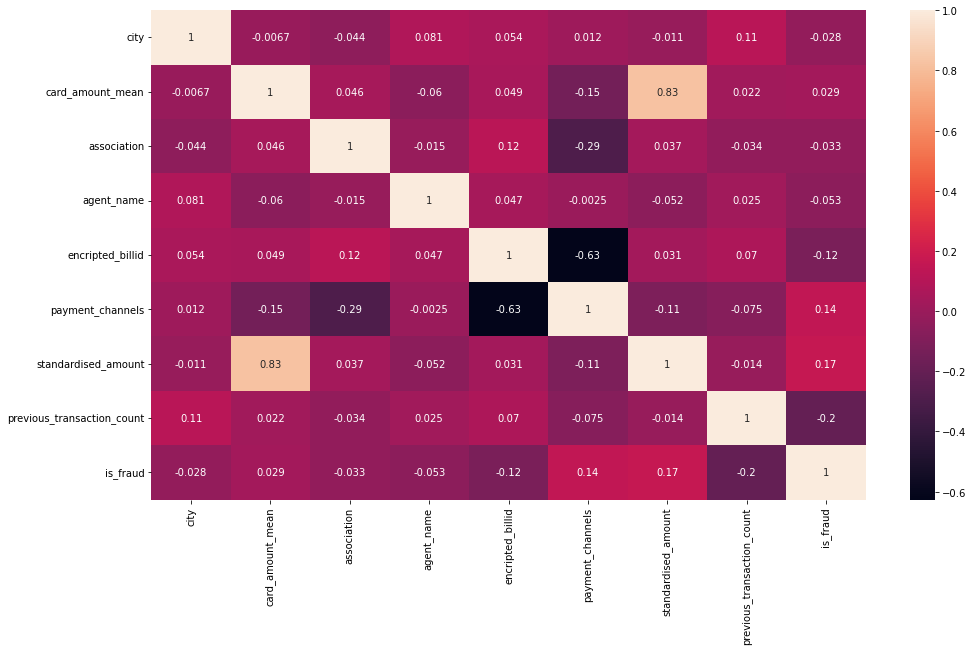

In [106]:
plt.figure(figsize=(16,9))
sns.heatmap(data_f1.corr(),annot=True)

<AxesSubplot:>

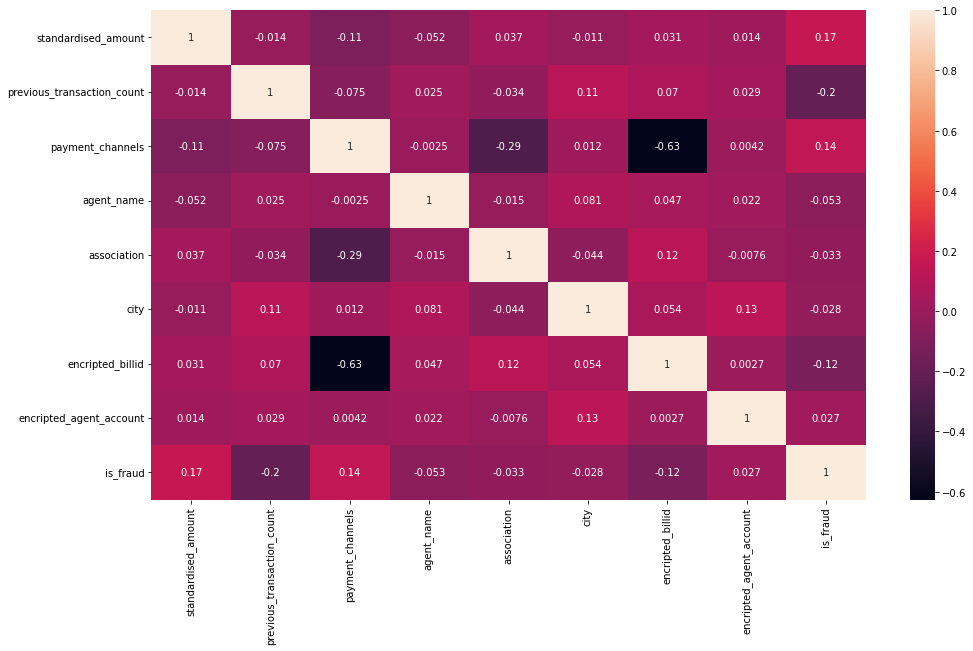

In [107]:
plt.figure(figsize=(16,9))
sns.heatmap(data_f2.corr(),annot=True)

<AxesSubplot:>

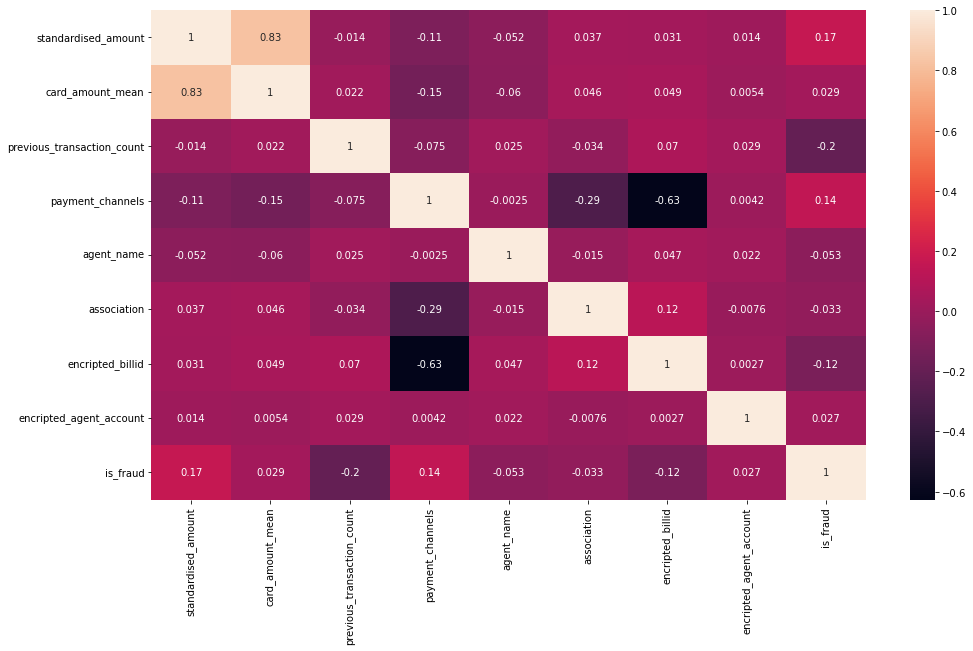

In [108]:
plt.figure(figsize=(16,9))
sns.heatmap(data_f3.corr(),annot=True)

In [109]:
print(cor_feature)
print(chi_feature)
print(rfe_feature)

['city', 'card_amount_mean', 'association', 'agent_name', 'encripted_billid', 'payment_channels', 'standardised_amount', 'previous_transaction_count']
['standardised_amount', 'previous_transaction_count', 'payment_channels', 'agent_name', 'association', 'city', 'encripted_billid', 'encripted_agent_account']
['standardised_amount', 'card_amount_mean', 'previous_transaction_count', 'payment_channels', 'agent_name', 'association', 'encripted_billid', 'encripted_agent_account']


In [110]:
data_f1.head()

,city,card_amount_mean,association,agent_name,encripted_billid,payment_channels,standardised_amount,previous_transaction_count,is_fraud
801654,32.0,22.308558,4.0,75.0,258587.0,0.0,6.348138,2.0,0.0
185115,11.0,75.667300,8.0,35.0,298002.0,0.0,47.449548,4.0,0.0
268429,32.0,76.134480,4.0,76.0,247882.0,0.0,16.711230,64.0,0.0
200943,11.0,10.956719,7.0,55.0,11431.0,1.0,23.861377,3.0,0.0
162369,11.0,51.005123,2.0,30.0,176090.0,0.0,25.257921,2.0,0.0


In [111]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('encripted_agent_account + city + association + agent_name + encripted_billid + \
                          payment_channels + standardised_amount + previous_transaction_count ~ is_fraud',data=data_f1)
print(fit.mv_test())

PatsyError: Error evaluating factor: NameError: name 'encripted_agent_account' is not defined
    encripted_agent_account + city + association + agent_name + encripted_billid +                           payment_channels + standardised_amount + previous_transaction_count ~ is_fraud
    ^^^^^^^^^^^^^^^^^^^^^^^

In [112]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('standardised_amount + previous_transaction_count + payment_channels + agent_name + association + \
                          city + encripted_billid + encripted_agent_account ~ is_fraud',data=data_f2)
print(fit.mv_test())

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept        Value  Num DF    Den DF     F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda 0.0927 8.0000 130535.0000 159790.3722 0.0000
         Pillai's trace 0.9073 8.0000 130535.0000 159790.3722 0.0000
 Hotelling-Lawley trace 9.7930 8.0000 130535.0000 159790.3722 0.0000
    Roy's greatest root 9.7930 8.0000 130535.0000 159790.3722 0.0000
--------------------------------------------------------------------
                                                                    
--------------------------------------------------------------------
          is_fraud        Value  Num DF    Den DF    F Value  Pr > F
--------------------------------------------------------------------
            Wilks' lambda 0.9078 8.0000 130535.0000 1658

In [113]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('transaction_time + standardised_amount + card_amount_mean + previous_transaction_count + \
                          payment_channels + agent_name + encripted_billid + encripted_agent_account ~ is_fraud',data=data_f3)
print(fit.mv_test())

PatsyError: Error evaluating factor: NameError: name 'transaction_time' is not defined
    transaction_time + standardised_amount + card_amount_mean + previous_transaction_count +                           payment_channels + agent_name + encripted_billid + encripted_agent_account ~ is_fraud
    ^^^^^^^^^^^^^^^^

hence Recursive Feature Elimination is providing unstable fetures hence we are going to omit it

# Based on the three feature-sets produced in above, 5 machine learning algorithms to make the required predictions.

#### Logistics Regression

##### using Pearson correlation feature selection

### i. Confusion matrix (use a heatmap from the seaborn package)

#### Confusion matrix using data frame derived from Pearson

In [114]:
# cor_feature = pd.DataFrame(traindf[cor_feature])
# cor_feature['is_fraud'] = traindf['is_fraud']

print(traindf.shape)
print(data_f1.shape)

cor_feature1 = pd.concat([legit_sample,fraud],axis=0)

(130544, 12)
(130544, 9)


<AxesSubplot:>

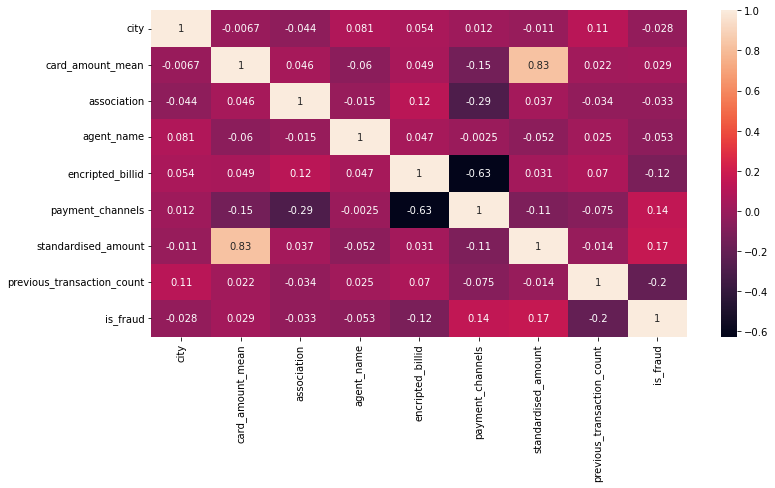

In [115]:
plt.figure(figsize=(12,6))
sns.heatmap(data_f1.corr(),annot=True)

#### Confusion matrix using data frame derived from Chi-Square Features

In [116]:
data_f1.columns

Index(['city', 'card_amount_mean', 'association', 'agent_name',
       'encripted_billid', 'payment_channels', 'standardised_amount',
       'previous_transaction_count', 'is_fraud'],
      dtype='object')

In [117]:
TargetVariable = 'is_fraud'

In [118]:
Predictors = data_f1.drop('is_fraud',axis=1).columns

In [119]:
X = data_f1[Predictors].values
y = data_f1['is_fraud'].values

In [120]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [121]:
data_f1[Predictors].head()

,city,card_amount_mean,association,agent_name,encripted_billid,payment_channels,standardised_amount,previous_transaction_count
801654,32.0,22.308558,4.0,75.0,258587.0,0.0,6.348138,2.0
185115,11.0,75.667300,8.0,35.0,298002.0,0.0,47.449548,4.0
268429,32.0,76.134480,4.0,76.0,247882.0,0.0,16.711230,64.0
200943,11.0,10.956719,7.0,55.0,11431.0,1.0,23.861377,3.0
162369,11.0,51.005123,2.0,30.0,176090.0,0.0,25.257921,2.0


## Standardization / Normalization of data

In [122]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(91380, 8)
(91380,)
(39164, 8)
(39164,)


## Logistic Regression

In [131]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
print(LOG)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LogisticRegression(C=1, solver='newton-cg')
LogisticRegression(C=1, solver='newton-cg')
              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70     19631
         1.0       0.69      0.78      0.74     19533

    accuracy                           0.72     39164
   macro avg       0.72      0.72      0.72     39164
weighted avg       0.72      0.72      0.72     39164

[[12893  6738]
 [ 4225 15308]]
Accuracy of the model on Testing Sample Data: 0.72

Accuracy values for 10-fold Cross Validation:
 [0.72892776 0.74690959 0.7274749  0.72034878 0.72943283 0.71952948
 0.70286728 0.699866   0.68859103 0.70946728]

Final Average Accuracy of the model: 0.72


## XGBoost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     19631
         1.0       0.97      1.00      0.99     19533

    accuracy                           0.99     39164
   macro avg       0.99      0.99      

<AxesSubplot:>

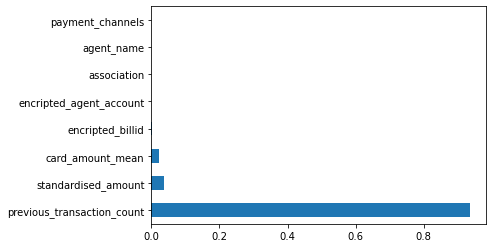

In [146]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## KNN

In [134]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

         0.0       0.76      0.66      0.71     19631
         1.0       0.70      0.79      0.74     19533

    accuracy                           0.73     39164
   macro avg       0.73      0.73      0.73     39164
weighted avg       0.73      0.73      0.73     39164

[[13032  6599]
 [ 4087 15446]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.69057101 0.74472584 0.72365032 0.73082244 0.73628037 0.72040751
 0.71138106 0.72130474 0.71195645 0.69758742]

Final Average Accuracy of the model: 0.72


## Naive Bayes

In [124]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

         0.0       1.00      0.44      0.61     19631
         1.0       0.64      1.00      0.78     19533

    accuracy                           0.72     39164
   macro avg       0.82      0.72      0.70     39164
weighted avg       0.82      0.72      0.70     39164

[[ 8700 10931]
 [   22 19511]]
Accuracy of the model on Testing Sample Data: 0.7

Accuracy values for 10-fold Cross Validation:
 [0.70627183 0.69952601 0.69728087 0.6932883  0.69250626 0.69827845
 0.69414497 0.6941008  0.69522279 0.68186739]

Final Average Accuracy of the model: 0.7


## SVM

In [125]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
print(0)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)

prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics

print(metrics.classification_report(y_test, prediction))

print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')


0
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90     19631
         1.0       0.89      0.91      0.90     19533

    accuracy                           0.90     39164
   macro avg       0.90      0.90      0.90     39164
weighted avg       0.90      0.90      0.90     39164

[[17513  2118]
 [ 1781 17752]]
Accuracy of the model on Testing Sample Data: 0.9

Accuracy values for 10-fold Cross Validation:
 [0.9033993  0.92320351 0.89995139 0.90071923 0.90705447 0.90071885
 0.88537828 0.88584285 0.88422473 0.89528109]

Final Average Accuracy of the model: 0.9


## ii) Roc Curve showing the AUC of all the machine learning algorithms used before and after feature selection (this means you will have to plot 4 Roc curves i.e one for each feature selection method and one for the original unadulterated data)

#### original unaltered data

In [136]:
original.columns

Index(['transaction_time', 'standardised_amount', 'card_amount_mean',
       'previous_transaction_count', 'payment_channels', 'agent_name',
       'association', 'city', 'encripted_billid', 'encripted_agent_account',
       'dayOfWeek', 'is_fraud'],
      dtype='object')

In [137]:
original.head()

,transaction_time,standardised_amount,card_amount_mean,previous_transaction_count,payment_channels,agent_name,association,city,encripted_billid,encripted_agent_account,dayOfWeek,is_fraud
341014,171303.0,10.069769,16.191622,6.0,0.0,141.0,15.0,2.0,124588.0,111.0,5.0,0.0
193393,170720.0,24.216798,53.084704,1.0,0.0,55.0,2.0,11.0,172873.0,36.0,4.0,0.0
279383,120238.0,3.406531,14.501704,10.0,0.0,69.0,4.0,10.0,250978.0,21.0,5.0,0.0
23204,93928.0,8.666667,8.666667,1.0,1.0,50.0,7.0,11.0,37181.0,53.0,3.0,0.0
651111,133324.0,16.048814,16.048814,1.0,0.0,101.0,14.0,11.0,342687.0,143.0,6.0,0.0


In [138]:
#Train and test split
from sklearn.model_selection import train_test_split
ab = original['is_fraud']
cd = original.drop('is_fraud',axis=1)
cd_train, cd_test, ab_train, ab_test = train_test_split(cd, ab, random_state=0, test_size=.20)


# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [139]:
original.shape

(130544, 12)

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
{
    'label': 'KNN',
    'model': KNeighborsClassifier(),    
},
# {
#     'label': 'SVC',
#     'model': SVC(random_state=0,probability=True),    
# }
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(cd_train, ab_train) # train the model
    ab_pred=model.predict(cd_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(ab_test, model.predict_proba(cd_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(ab_test,model.predict(cd_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="upper left")
plt.show()   # Display

NameError: name 'KNeighborsClassifier' is not defined

<Figure size 432x288 with 0 Axes>

#### Pearson Correlation

In [132]:
data_f1.columns

Index(['city', 'encripted_agent_account', 'association', 'agent_name',
       'encripted_billid', 'payment_channels', 'standardised_amount',
       'previous_transaction_count', 'is_fraud'],
      dtype='object')

In [133]:
#Train and test split
from sklearn.model_selection import train_test_split
ab = data_f1['is_fraud']
cd = data_f1.drop('is_fraud',axis=1)
cd_train, cd_test, ab_train, ab_test = train_test_split(cd, ab, random_state=0, test_size=.20)


# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

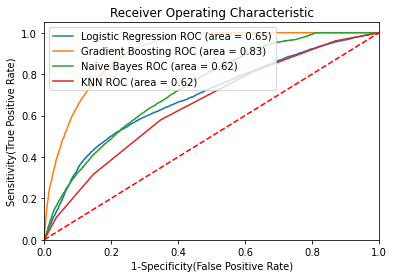

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
{
    'label': 'KNN',
    'model': KNeighborsClassifier(),    
},
# {
#     'label': 'SVC',
#     'model': SVC(random_state=0,probability=True),    
# }
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(cd_train, ab_train) # train the model
    ab_pred=model.predict(cd_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(ab_test, model.predict_proba(cd_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(ab_test,model.predict(cd_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="upper left")
plt.show()   # Display

## iv) Plot the accuracy recall graphs for each method used.

#### Pearson Correlation

In [146]:
#Train and test split
from sklearn.model_selection import train_test_split
ab = data_f1['is_fraud']
cd = data_f1.drop('is_fraud',axis=1)
cd_train, cd_test, ab_train, ab_test = train_test_split(cd, ab, random_state=42, test_size=.25)

In [147]:
## training our models. It also shows you how to grab probabilities for the positive class:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model_lr = LogisticRegression().fit(cd_train, ab_train)
probs_lr = model_lr.predict_proba(cd_test)[:, 1]

model_xg = XGBClassifier().fit(cd_train, ab_train)
probs_xg = model_xg.predict_proba(cd_test)[:, 1]

model_knn = KNeighborsClassifier().fit(cd_train, ab_train)
probs_knn = model_knn.predict_proba(cd_test)[:, 1]

model_nb = GaussianNB().fit(cd_train, ab_train)
probs_nb = model_nb.predict_proba(cd_test)[:, 1]

model_svc = SVC(random_state=0,probability=True).fit(cd_train, ab_train)
probs_svc = model_svc.predict_proba(cd_test)[:, 1]

In [144]:
# obtaining the values for precision, recall, and AUC (Area Under the Curve) for every model next. 
# The only requirement is to remap the Good and Bad class names to 1 and 0, respectively

from sklearn.metrics import auc, precision_recall_curve

y_test_int = ab_test.replace({1.0: 1, 0.0: 0})

baseline_model = sum(y_test_int == 1) / len(y_test_int)

precision_lr, recall_lr, _ = precision_recall_curve(y_test_int, probs_lr)
auc_lr = auc(recall_lr, precision_lr)

precision_xg, recall_xg, _ = precision_recall_curve(y_test_int, probs_xg)
auc_xg = auc(recall_xg, precision_xg)

precision_knn, recall_knn, _ = precision_recall_curve(y_test_int, probs_knn)
auc_knn = auc(recall_knn, precision_knn)

precision_nb, recall_nb, _ = precision_recall_curve(y_test_int, probs_nb)
auc_nb = auc(recall_nb, precision_nb)

precision_svc, recall_svc, _ = precision_recall_curve(y_test_int, probs_svc)
auc_svc = auc(recall_svc, precision_svc)

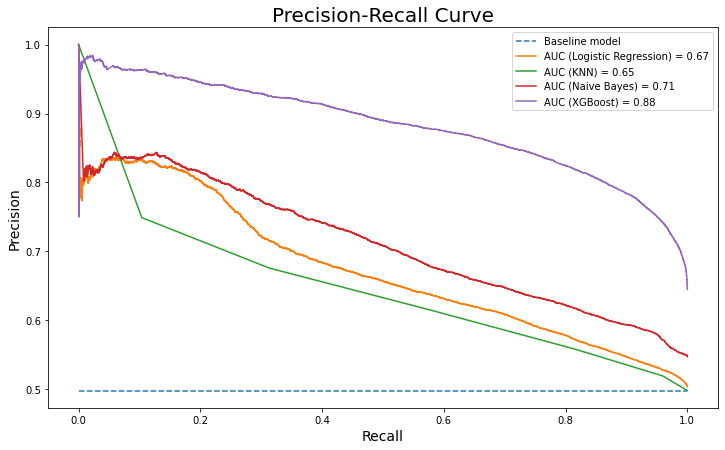

In [145]:

plt.figure(figsize=(12, 7))
plt.plot([0, 1], [baseline_model, baseline_model], linestyle='--', label='Baseline model')
plt.plot(recall_lr, precision_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(recall_knn, precision_knn, label=f'AUC (KNN) = {auc_knn:.2f}')
plt.plot(recall_nb, precision_nb, label=f'AUC (Naive Bayes) = {auc_nb:.2f}')
plt.plot(recall_xg, precision_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.title('Precision-Recall Curve', size=20)
# plt.plot(recall_svc, precision_svc, label=f'AUC (SVM) = {auc_svc:.2f}')
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend();

# Pickle Use And Exportations of model to be used in Next.js Application To be used in the Bank with easy use access

## Saving model to disk

In [126]:
pickle.dump(NB, open('NB_pickle.pkl','wb'))
pickle.dump(LOG, open('LOG_pickle.pkl','wb'))
pickle.dump(KNN, open('KNN_pickle.pkl','wb'))
pickle.dump(SVM, open('SVM_pickle.pkl','wb'))
pickle.dump(XGB, open('XGB_pickle.pkl','wb'))

## Loading model to compare the results

In [142]:
data_f1.head()

,card_amount_mean,association,encripted_agent_account,agent_name,encripted_billid,payment_channels,standardised_amount,previous_transaction_count,is_fraud
341014,16.191622,15.0,111.0,141.0,124588.0,0.0,10.069769,6.0,0.0
193393,53.084704,2.0,36.0,55.0,172873.0,0.0,24.216798,1.0,0.0
279383,14.501704,4.0,21.0,69.0,250978.0,0.0,3.406531,10.0,0.0
23204,8.666667,7.0,53.0,50.0,37181.0,1.0,8.666667,1.0,0.0
651111,16.048814,14.0,143.0,101.0,342687.0,0.0,16.048814,1.0,0.0


In [143]:
custom_X = [[16.191622,15.0,111.0,141.0,124588.0,0.0,10.069769,6.0]]

from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()
PredictorScalerFit_custom_X = PredictorScaler.fit(custom_X)
custom_X_ = PredictorScalerFit_custom_X.transform(custom_X)

print(custom_X_)

[[0. 0. 0. 0. 0. 0. 0. 0.]]


In [145]:
NB_pickle = pickle.load(open('NB_pickle.pkl','rb'))
print(NB_pickle.predict(custom_X)[0])

1.0


# THE END 